# FYP ICT3909 - Yolov12 Training
---

**Name:** Andrea Filiberto Lucas  
**ID No:** 0279704L

---

## Automated Dataset Management with Roboflow and Folder Organization

This script automates the process of managing a dataset using Roboflow. It creates necessary directories, checks for installed dependencies, installs them if missing, and downloads the dataset. It also organizes the dataset into a structured folder hierarchy, ensuring everything is ready for further use.

In [2]:
import os
import subprocess
import shutil
import importlib

# Constants for colored output
COLORS = {
    "green": "\033[92m",  # Green text
    "red": "\033[91m",    # Red text
    "reset": "\033[0m"    # Reset to default color
}

# Define the path to the Versions folder and the target subfolder
versions_path = os.path.abspath(os.path.join("..", "Other", "Versions"))
target_subfolder = os.path.join(versions_path, "NGD-Yolov12")

# Check if the Versions folder exists, if not, create it
if not os.path.exists(versions_path):
    os.makedirs(versions_path)
    print(f"[{COLORS['green']}✔{COLORS['reset']}] Folder created at: {versions_path}")

# Check if the MDD-AFL-Yolov12 subfolder exists
if os.path.exists(target_subfolder):
    print(f"[{COLORS['green']}✔{COLORS['reset']}] The subfolder '{target_subfolder}' already exists. Skipping download!")
else:
    # Check if roboflow is installed
    if importlib.util.find_spec("roboflow") is not None:                                                                                                        # type: ignore
        print(f"[{COLORS['green']}✔{COLORS['reset']}] Roboflow is already installed!")
    else:
        # Install roboflow using pip
        try:
            subprocess.check_call(["pip", "install", "roboflow"])
            print(f"[{COLORS['green']}✔{COLORS['reset']}] Roboflow successfully installed!")
        except subprocess.CalledProcessError as e:
            print(f"[{COLORS['red']}✖{COLORS['reset']}]Failed to install Roboflow. Please check your setup.")
            raise e

    # Import and use Roboflow
    from roboflow import Roboflow                                                                                                                               # type: ignore

    # Prompt the user for their API key
    print("Please enter your Roboflow API key to download the dataset...")
    api_key = input("Please enter your Roboflow API key: ")

    # Initialize Roboflow with the provided API key
    rf = Roboflow(api_key=api_key)

    # Retrieve project and version
    project = rf.workspace("ict3909-fyp").project("news-graphic-dataset")
    version = project.version(1)

    # Download the dataset
    dataset = version.download("yolov12")

    current_folder = os.getcwd()  # Get the current working directory
    original_folder = os.path.join(current_folder, "News-Graphic-Dataset-1")
    renamed_folder = os.path.join(current_folder, "NGD-Yolov12")
    target_folder = os.path.join(versions_path, "NGD-Yolov12")

    # Check if the original folder exists   
    if os.path.exists(original_folder):
        # Rename the folder
        os.rename(original_folder, renamed_folder)

        # Move the renamed folder to ../Versions/
        shutil.move(renamed_folder, target_folder)
        print(f"[{COLORS['green']}✔{COLORS['reset']}] Folder downloaded to: {target_folder}")
    else:
        print(f"[{COLORS['red']}✖{COLORS['reset']}]Folder '{original_folder}' does not exist. No action taken.")


[✔] The subfolder '/Volumes/Filis SSD/FYP/Accurate-Name-Extraction/Other/Versions/NGD-Yolov12' already exists. Skipping download!


## Automated Library Installer in Python

This script automates checking and installing libraries from a JSON file. It verifies installations, installs missing libraries via `pip`, and provides clear, colored output for success or errors. With built-in error handling and preloaded common libraries, it simplifies dependency management in Python projects.

In [3]:
import json
import importlib.util

# Path to the JSON file
lib_file_path = os.path.join("..", "Other", "Libraries", "Yolo.json")

# Read the libraries from the JSON file
try:
    with open(lib_file_path, 'r') as file:
        libraries = json.load(file)
except FileNotFoundError:
    print(f"{COLORS['red']}Error: Library file not found at {lib_file_path}{COLORS['reset']}")
    exit(1)
except json.JSONDecodeError:
    print(f"{COLORS['red']}Error: Failed to decode JSON from the library file.{COLORS['reset']}")
    exit(1)

# Function to check and install libraries
def check_and_install_libraries(libraries):
    for lib, import_name in libraries.items():
        # Check if the library is installed by checking its module spec
        if importlib.util.find_spec(import_name) is not None:
            print(f"[{COLORS['green']}✔{COLORS['reset']}] Library '{lib}' is already installed.")
        else:
            # If the library is not found, try to install it
            print(f"[{COLORS['red']}✖{COLORS['reset']}] Library '{lib}' is not installed. Installing...")
            try:
                subprocess.check_call(["pip", "install", lib])
                print(f"[{COLORS['green']}✔{COLORS['reset']}] Successfully installed '{lib}'.")
            except subprocess.CalledProcessError:
                print(f"[{COLORS['red']}✖{COLORS['reset']}] Failed to install '{lib}'. Please install it manually.")


# Execute the function to check and install libraries
check_and_install_libraries(libraries)

# Import necessary libraries 
import time
import torch                                                                                                                                                    #type: ignore
import random
import pandas as pd                                                                                                                                             #type: ignore
import cv2                                                                                                                                                      #type: ignore
import matplotlib.pyplot as plt                                                                                                                                 #type: ignore
import seaborn as sns                                                                                                                                           #type: ignore
import numpy as np                                                                                                                                              #type: ignore
import matplotlib.patches as patches                                                                                                                            #type: ignore
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm                                                                                                                                           #type: ignore
from ultralytics import YOLO                                                                                                                                    #type: ignore
from IPython.display import Image, display                                                                                                                      #type: ignore

[✔] Library 'opencv-python' is already installed.
[✔] Library 'matplotlib' is already installed.
[✔] Library 'tqdm' is already installed.
[✔] Library 'ultralytics' is already installed.


## Determine the Available Device for Computation

This function identifies and selects the best available device for running deep learning models, prioritizing hardware acceleration via CUDA (GPU) or MPS (Metal Performance Shaders). If no hardware acceleration is available, it defaults to the CPU and notifies the user.

In [4]:
# Determine the available device: CUDA, MPS, or CPU.
def determine_device():
    if torch.cuda.is_available():
        device = "cuda"
        print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    elif torch.backends.mps.is_available():
        device = "mps"
        print("Using MPS (Metal Performance Shaders) for acceleration.")
    else:
        device = "cpu"
        print("Using CPU. Consider enabling GPU or MPS for faster training.")
    return device

## Training process for Yolov12 object detector.
### Experiment Configuration for YOLOv12

Defines the path to the `data.yaml` file and key hyperparameters for conducting experiments with YOLOv12. These settings include the number of epochs, image size, batch size, and a customizable experiment name for version tracking and organization.

In [12]:
# Path to data.yaml
data_yaml_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "Other", "Versions", "NGD-Yolov12", "data.yaml")

# Prompt user for hyperparameters
try:
    epochs = int(input("Enter the number of epochs: "))
    experiment_number = int(input("Enter the experiment number: "))
    experiment_name = f"NGD-Yolov12_v{experiment_number}"
except ValueError:
    print("Invalid input. Please enter valid numbers for epochs and experiment number.")
    raise

# Display selected parameters
print(f"Selected epochs: {epochs}")
print(f"Experiment name: {experiment_name}")

# Hyperparameters
imgsz = 640
batch_size = 8

Selected epochs: 100
Experiment name: NGD-Yolov12_v101


In [14]:
# Timer start
start_time = time.time()

# Create or load a YOLOv12 model (from scratch)
try:
    model = YOLO("yolo12.yaml")  # specify architecture
except FileNotFoundError:
    print("Error: YOLOv12 configuration file 'yolo12.yaml' not found. Check setup!")
    raise

# Train
try:
    model.train(
        data=data_yaml_path,
        epochs=epochs,
        imgsz=imgsz,
        batch=batch_size,
        name=experiment_name,
        pretrained=False,  
        plots=True,
        device = "cuda" if torch.cuda.is_available() else "cpu",
        patience=10,
        dropout=0.4,
        cos_lr=True,
        lr0=0.0001,
        lrf=0.00001,
    )
except Exception as e:
    print(f"Error during training: {e}")
    raise

# Timer end
end_time = time.time()
# Calculate elapsed time
elapsed_time = end_time - start_time
# Convert seconds to hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)
print(f"Training completed in {hours}h {minutes}m {seconds}s.")

# Evaluate
try:
    metrics = model.val()
    print("Validation Metrics:", metrics)
except Exception as e:
    print(f"Error during validation: {e}")
    raise

WARNING  no model scale passed. Assuming scale='n'.
Ultralytics 8.3.102  Python-3.11.7 torch-2.8.0.dev20250403+cu128 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo12.yaml, data=e:\FYP\Accurate-Name-Extraction\Other\Versions\NGD-Yolov12\data.yaml, epochs=100, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=NGD-Yolov12_v101, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.4, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

100%|██████████| 755k/755k [00:00<00:00, 4.39MB/s]

Overriding model.yaml nc=80 with nc=6


WARNING  no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    29542

train: Scanning E:\FYP\Accurate-Name-Extraction\Other\Versions\NGD-Yolov12\train\labels... 5250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5250/5250 [00:44<00:00, 117.20it/s]


train: New cache created: E:\FYP\Accurate-Name-Extraction\Other\Versions\NGD-Yolov12\train\labels.cache


val: Scanning E:\FYP\Accurate-Name-Extraction\Other\Versions\NGD-Yolov12\valid\labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:02<00:00, 131.69it/s]

val: New cache created: E:\FYP\Accurate-Name-Extraction\Other\Versions\NGD-Yolov12\valid\labels.cache


Plotting labels to runs\detect\NGD-Yolov12_v101\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to runs\detect\NGD-Yolov12_v101
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.8G      3.821      4.349      3.365          4        640: 100%|██████████| 657/657 [04:49<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.52it/s]

                   all        300        943     0.0726      0.231     0.0648      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.42G      2.438      2.563      2.174         19        640: 100%|██████████| 657/657 [04:36<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all        300        943      0.283       0.45      0.336      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.43G      1.934      2.048      1.793          9        640: 100%|██████████| 657/657 [04:29<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.47it/s]

                   all        300        943      0.394      0.546      0.476      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.43G      1.709      1.809       1.61          4        640: 100%|██████████| 657/657 [04:29<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]

                   all        300        943      0.456       0.63      0.567       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.43G      1.549      1.635      1.486         18        640: 100%|██████████| 657/657 [04:32<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]

                   all        300        943      0.622        0.6      0.595      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.43G      1.428      1.523        1.4         11        640: 100%|██████████| 657/657 [04:22<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.77it/s]

                   all        300        943      0.646      0.702      0.691      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.43G      1.357      1.422      1.329          7        640: 100%|██████████| 657/657 [04:53<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        300        943      0.636      0.655      0.694      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.43G      1.283      1.348       1.28          8        640: 100%|██████████| 657/657 [04:22<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.50it/s]

                   all        300        943      0.597      0.703      0.701      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.43G      1.232      1.287      1.243         20        640: 100%|██████████| 657/657 [04:23<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.02it/s]

                   all        300        943      0.684      0.721      0.727      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.43G      1.189      1.228      1.203          8        640: 100%|██████████| 657/657 [04:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]

                   all        300        943      0.667      0.756      0.755      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.43G      1.156      1.182      1.179         10        640: 100%|██████████| 657/657 [04:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]

                   all        300        943      0.672      0.772      0.774      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.45G      1.123      1.143       1.16          1        640: 100%|██████████| 657/657 [04:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.79it/s]

                   all        300        943      0.719      0.751      0.786      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.45G      1.097      1.112      1.146          1        640: 100%|██████████| 657/657 [04:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]

                   all        300        943      0.728      0.747      0.777       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.45G      1.082      1.083       1.13          3        640: 100%|██████████| 657/657 [04:23<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all        300        943      0.761       0.75      0.807      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.45G      1.052       1.05      1.109          7        640: 100%|██████████| 657/657 [04:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.88it/s]

                   all        300        943      0.755       0.76      0.805       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.45G      1.033      1.016      1.092         15        640: 100%|██████████| 657/657 [04:15<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.99it/s]

                   all        300        943      0.758      0.765      0.804       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.45G      1.006     0.9928      1.081         22        640: 100%|██████████| 657/657 [04:19<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]

                   all        300        943      0.756      0.777      0.812      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.45G     0.9867     0.9607      1.068         15        640: 100%|██████████| 657/657 [04:54<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]

                   all        300        943      0.824      0.744      0.829      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.45G     0.9892     0.9562      1.069          7        640: 100%|██████████| 657/657 [04:25<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        300        943      0.788      0.815      0.846      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.45G     0.9785     0.9327      1.059         13        640: 100%|██████████| 657/657 [04:19<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]

                   all        300        943       0.82      0.794      0.854      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.45G     0.9407     0.8948      1.044          4        640: 100%|██████████| 657/657 [04:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.76it/s]

                   all        300        943      0.818      0.795      0.846      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.45G     0.9397     0.8943       1.03         10        640: 100%|██████████| 657/657 [04:25<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.77it/s]

                   all        300        943      0.841       0.78      0.864      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.45G     0.9272     0.8708      1.032          5        640: 100%|██████████| 657/657 [04:25<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        300        943      0.825      0.785      0.855      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.45G     0.9175     0.8615      1.025         15        640: 100%|██████████| 657/657 [04:16<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]

                   all        300        943      0.811      0.818      0.863      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.45G      0.904     0.8392      1.018          3        640: 100%|██████████| 657/657 [04:19<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]

                   all        300        943      0.866       0.78      0.879      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.45G     0.8902     0.8274      1.017          5        640: 100%|██████████| 657/657 [04:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]

                   all        300        943      0.821      0.839      0.872      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.45G     0.8862     0.8176       1.01         16        640: 100%|██████████| 657/657 [04:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.91it/s]

                   all        300        943      0.833      0.836      0.886      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.45G     0.8791     0.8026      1.008          3        640: 100%|██████████| 657/657 [04:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.72it/s]

                   all        300        943      0.841      0.835      0.883      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.45G     0.8729     0.7897     0.9967          9        640: 100%|██████████| 657/657 [04:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.97it/s]

                   all        300        943      0.828      0.827      0.879      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.45G     0.8668      0.776     0.9935          9        640: 100%|██████████| 657/657 [04:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.83it/s]

                   all        300        943      0.842      0.858      0.894      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.45G     0.8555     0.7657     0.9889          2        640: 100%|██████████| 657/657 [04:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.92it/s]

                   all        300        943      0.855      0.863      0.889       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.45G     0.8508     0.7574     0.9859         11        640: 100%|██████████| 657/657 [04:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.94it/s]

                   all        300        943      0.847      0.832      0.884      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.45G     0.8374     0.7478     0.9819          7        640: 100%|██████████| 657/657 [04:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]

                   all        300        943      0.872      0.841      0.897      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.45G     0.8369     0.7417     0.9842          4        640: 100%|██████████| 657/657 [04:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.96it/s]

                   all        300        943       0.87      0.827      0.892      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.45G     0.8261     0.7239     0.9773         10        640: 100%|██████████| 657/657 [04:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.94it/s]

                   all        300        943      0.871      0.844      0.909      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.45G     0.8146      0.709     0.9692         14        640: 100%|██████████| 657/657 [04:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.78it/s]

                   all        300        943      0.877      0.866      0.902      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.45G     0.8089     0.7011     0.9652          7        640: 100%|██████████| 657/657 [04:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.92it/s]

                   all        300        943      0.863      0.864      0.909      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.45G      0.802     0.6973     0.9602          9        640: 100%|██████████| 657/657 [04:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.97it/s]

                   all        300        943      0.871      0.875      0.901       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.45G     0.7988     0.6864     0.9628         14        640: 100%|██████████| 657/657 [04:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.82it/s]

                   all        300        943      0.879      0.861      0.912      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.45G     0.7962     0.6794     0.9597          9        640: 100%|██████████| 657/657 [04:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.01it/s]

                   all        300        943      0.895      0.878      0.917      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.45G      0.782     0.6688     0.9538         12        640: 100%|██████████| 657/657 [04:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.97it/s]

                   all        300        943      0.862      0.869      0.905      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.45G     0.7843     0.6709     0.9536         10        640: 100%|██████████| 657/657 [04:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]

                   all        300        943      0.893      0.868      0.907      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.45G      0.782     0.6673     0.9556         10        640: 100%|██████████| 657/657 [04:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]

                   all        300        943      0.867      0.878      0.918       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.45G     0.7707     0.6515     0.9465          6        640: 100%|██████████| 657/657 [04:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]

                   all        300        943      0.891      0.884      0.916      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.45G      0.764     0.6403     0.9474         10        640: 100%|██████████| 657/657 [04:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]

                   all        300        943        0.9      0.887      0.924      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.45G     0.7678      0.628      0.944         13        640: 100%|██████████| 657/657 [04:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.84it/s]

                   all        300        943      0.898      0.877      0.917      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.45G     0.7557     0.6274     0.9383          9        640: 100%|██████████| 657/657 [04:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]

                   all        300        943      0.885      0.864      0.914      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.45G     0.7424     0.6146     0.9369          7        640: 100%|██████████| 657/657 [04:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]

                   all        300        943      0.899      0.865      0.924      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.45G     0.7562     0.6228     0.9361         10        640: 100%|██████████| 657/657 [04:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]

                   all        300        943      0.891      0.877      0.915      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.45G     0.7446     0.6078     0.9363         16        640: 100%|██████████| 657/657 [04:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.99it/s]

                   all        300        943      0.902      0.892      0.921      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.45G     0.7388     0.5977     0.9304         12        640: 100%|██████████| 657/657 [04:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]

                   all        300        943      0.907      0.879      0.922      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.45G     0.7341     0.5995      0.929          6        640: 100%|██████████| 657/657 [04:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.85it/s]

                   all        300        943      0.908      0.881       0.93      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.45G     0.7352     0.5905     0.9272          3        640: 100%|██████████| 657/657 [04:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.98it/s]

                   all        300        943      0.914      0.888       0.93      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.45G      0.731     0.5881     0.9286         14        640: 100%|██████████| 657/657 [04:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.91it/s]

                   all        300        943      0.899       0.89      0.924      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.45G      0.725     0.5814     0.9255          8        640: 100%|██████████| 657/657 [04:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.96it/s]

                   all        300        943      0.912      0.887       0.93       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.45G      0.721      0.579     0.9251         15        640: 100%|██████████| 657/657 [04:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.82it/s]

                   all        300        943       0.89      0.905      0.929      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.45G      0.715     0.5675     0.9202          7        640: 100%|██████████| 657/657 [04:13<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]

                   all        300        943      0.901      0.884      0.922      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.45G     0.7132     0.5681      0.923         14        640: 100%|██████████| 657/657 [04:13<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.93it/s]

                   all        300        943      0.925      0.877      0.931       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.45G     0.7086     0.5623     0.9187         10        640: 100%|██████████| 657/657 [03:52<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]

                   all        300        943      0.905      0.879      0.923      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.45G     0.7128      0.565     0.9167         14        640: 100%|██████████| 657/657 [04:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]

                   all        300        943      0.905      0.875      0.925      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.45G      0.696      0.554     0.9153         11        640: 100%|██████████| 657/657 [04:13<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.90it/s]

                   all        300        943       0.91      0.874      0.932      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.45G     0.6967     0.5503     0.9128         19        640: 100%|██████████| 657/657 [04:12<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]

                   all        300        943      0.909      0.878      0.931      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.45G     0.6953     0.5447     0.9154         13        640: 100%|██████████| 657/657 [04:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        300        943      0.912      0.874      0.929      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.45G     0.6929     0.5415     0.9114          6        640: 100%|██████████| 657/657 [04:13<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.83it/s]

                   all        300        943      0.918      0.879      0.924      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.45G     0.6966     0.5369     0.9132          8        640: 100%|██████████| 657/657 [04:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.02it/s]

                   all        300        943       0.91      0.891      0.927      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.45G     0.6842     0.5248     0.9046          5        640: 100%|██████████| 657/657 [04:17<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all        300        943      0.911      0.895      0.933      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.45G     0.6814     0.5274     0.9084         17        640: 100%|██████████| 657/657 [04:33<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        300        943      0.916      0.878      0.932      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.45G     0.6777     0.5223     0.9052         13        640: 100%|██████████| 657/657 [04:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]

                   all        300        943      0.912      0.881      0.931      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.45G     0.6754     0.5197     0.9046          1        640: 100%|██████████| 657/657 [04:27<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        300        943      0.915      0.872      0.927      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.45G     0.6782     0.5165     0.9027         12        640: 100%|██████████| 657/657 [04:15<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.82it/s]

                   all        300        943      0.902      0.873      0.924      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.45G     0.6705     0.5156     0.9049          4        640: 100%|██████████| 657/657 [05:11<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.25it/s]

                   all        300        943      0.909      0.896      0.927      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.45G      0.661     0.5085     0.8997          8        640: 100%|██████████| 657/657 [04:51<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.57it/s]

                   all        300        943      0.899      0.898      0.931      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.45G     0.6646     0.5043     0.9006          3        640: 100%|██████████| 657/657 [04:29<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.76it/s]

                   all        300        943      0.881        0.9      0.925       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.45G     0.6653     0.5045     0.9001         10        640: 100%|██████████| 657/657 [04:23<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        300        943      0.902      0.892      0.926      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.45G     0.6563     0.4982     0.8946         12        640: 100%|██████████| 657/657 [04:24<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        300        943      0.903      0.895      0.928      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.45G     0.6609     0.4946     0.8974         10        640: 100%|██████████| 657/657 [04:19<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.92it/s]

                   all        300        943        0.9        0.9      0.928      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.45G     0.6549     0.4907      0.898          6        640: 100%|██████████| 657/657 [04:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.91it/s]

                   all        300        943      0.908      0.884      0.928      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.45G     0.6559     0.4881     0.8945         18        640: 100%|██████████| 657/657 [04:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]

                   all        300        943      0.908      0.886      0.923      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.45G     0.6478     0.4833     0.8933          9        640: 100%|██████████| 657/657 [04:22<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.63it/s]

                   all        300        943       0.91      0.894      0.929      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.45G     0.6491     0.4898     0.8955         17        640: 100%|██████████| 657/657 [04:27<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]

                   all        300        943      0.909      0.897      0.932      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.45G     0.6479     0.4846     0.8945          4        640: 100%|██████████| 657/657 [04:23<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]

                   all        300        943      0.904      0.905       0.93      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.45G     0.6484     0.4804     0.8926         11        640: 100%|██████████| 657/657 [04:24<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.77it/s]

                   all        300        943      0.912      0.893      0.928      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.45G     0.6445     0.4759     0.8909          9        640: 100%|██████████| 657/657 [04:14<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.94it/s]

                   all        300        943      0.907      0.901      0.929      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.45G     0.6368     0.4722     0.8881         10        640: 100%|██████████| 657/657 [04:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]

                   all        300        943      0.915      0.893      0.931      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.45G     0.6413     0.4752     0.8911         11        640: 100%|██████████| 657/657 [04:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.85it/s]

                   all        300        943      0.917      0.884      0.928      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.45G      0.641     0.4737     0.8917          3        640: 100%|██████████| 657/657 [04:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.93it/s]

                   all        300        943      0.904      0.891      0.928      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.45G     0.6425     0.4751     0.8874          9        640: 100%|██████████| 657/657 [04:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]

                   all        300        943      0.907      0.901      0.929      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.45G     0.6397      0.477     0.8899          8        640: 100%|██████████| 657/657 [04:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]

                   all        300        943      0.913      0.892       0.93      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.45G     0.6366     0.4732     0.8892          3        640: 100%|██████████| 657/657 [04:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]

                   all        300        943      0.894      0.908       0.93      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.45G     0.6424     0.4692      0.886         11        640: 100%|██████████| 657/657 [04:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.77it/s]

                   all        300        943      0.915      0.885       0.93      0.733


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.45G     0.7614     0.4412     0.8196          6        640: 100%|██████████| 657/657 [04:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all        300        943      0.905      0.891      0.929      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.45G     0.7534     0.4362     0.8177         38        640: 100%|██████████| 657/657 [04:08<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.90it/s]

                   all        300        943      0.906      0.895      0.929      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.45G     0.7583     0.4306     0.8181          7        640: 100%|██████████| 657/657 [04:08<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]

                   all        300        943      0.895      0.901       0.93      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.45G     0.7526     0.4285      0.815          4        640: 100%|██████████| 657/657 [04:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.88it/s]

                   all        300        943      0.894      0.905       0.93      0.736


EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 84, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

94 epochs completed in 6.982 hours.
Optimizer stripped from runs\detect\NGD-Yolov12_v101\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\NGD-Yolov12_v101\weights\best.pt, 5.5MB

Validating runs\detect\NGD-Yolov12_v101\weights\best.pt...
Ultralytics 8.3.102  Python-3.11.7 torch-2.8.0.dev20250403+cu128 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
YOLO12 summary (fused): 159 layers, 2,557,898 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.46it/s]


                   all        300        943      0.914      0.893      0.931      0.737
 Breaking News Graphic         47         48       0.85      0.938      0.919      0.681
Digital On-Screen Graphic        289        392      0.935      0.918      0.952      0.795
   Lower Third Graphic        147        156       0.95      0.923      0.968      0.765
         News Headline         99        100      0.951       0.98      0.978      0.952
           News Ticker        125        126      0.956      0.929      0.961      0.617
    Other News Graphic         92        121      0.844      0.673      0.805      0.614
Speed: 0.6ms preprocess, 7.5ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs\detect\NGD-Yolov12_v101
Training completed in 7h 1m 41s.
Ultralytics 8.3.102  Python-3.11.7 torch-2.8.0.dev20250403+cu128 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
YOLO12 summary (fused): 159 layers, 2,557,898 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning E:\FYP\Accurate-Name-Extraction\Other\Versions\NGD-Yolov12\valid\labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.48it/s]


                   all        300        943      0.914      0.893      0.931      0.737
 Breaking News Graphic         47         48       0.85      0.938      0.919      0.681
Digital On-Screen Graphic        289        392      0.935      0.918      0.952      0.795
   Lower Third Graphic        147        156       0.95      0.923      0.968      0.765
         News Headline         99        100      0.951       0.98      0.978      0.952
           News Ticker        125        126      0.956      0.929      0.961      0.617
    Other News Graphic         92        121      0.844      0.673      0.805      0.614
Speed: 0.7ms preprocess, 8.9ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs\detect\NGD-Yolov12_v1012
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000

In [ ]:
# Timer start
start_time = time.time()

# Create or load a YOLOv12 model (from scratch)
try:
    model = YOLO("Yolo-Version/yolo12m.pt")  # specify architecture
except FileNotFoundError:
    print("Error: YOLOv12 configuration file 'yolo12m.pt' not found. Check setup!")
    raise

# Train
try:
    model.train(
        data=data_yaml_path,
        epochs=epochs,
        imgsz=imgsz,
        batch=batch_size,
        name=experiment_name,
        pretrained=False,  
        plots=True,
        device = determine_device(),
        patience=10,
        dropout=0.4,
        cos_lr=True,
        lr0=0.0001,
        lrf=0.00001,
    )
except Exception as e:
    print(f"Error during training: {e}")
    raise

# Timer end
end_time = time.time()
# Calculate elapsed time
elapsed_time = end_time - start_time
# Convert seconds to hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)
print(f"Training completed in {hours}h {minutes}m {seconds}s.")

# Evaluate
try:
    metrics = model.val()
    print("Validation Metrics:", metrics)
except Exception as e:
    print(f"Error during validation: {e}")
    raise

## Results

### Ultralytics Results 

This script facilitates the selection and evaluation of YOLOv12 detection results stored in the `runs/detect` directory. It identifies folders ending with "R," lets the user choose one, and displays evaluation images within the selected folder (excluding "val_batch" files). Additionally, it checks the corresponding "non-R" folder for a `results.png` file and displays it if found.

Available folders:
1. NGD-Yolov12_v1R
2. NGD-Yolov12_v2R
3. NGD-Yolov12_v3R
4. NGD-Yolov12_v4R
5. NGD-Yolov8_v1R

Selected folder: NGD-Yolov12_v4R

Displaying evaluation images:


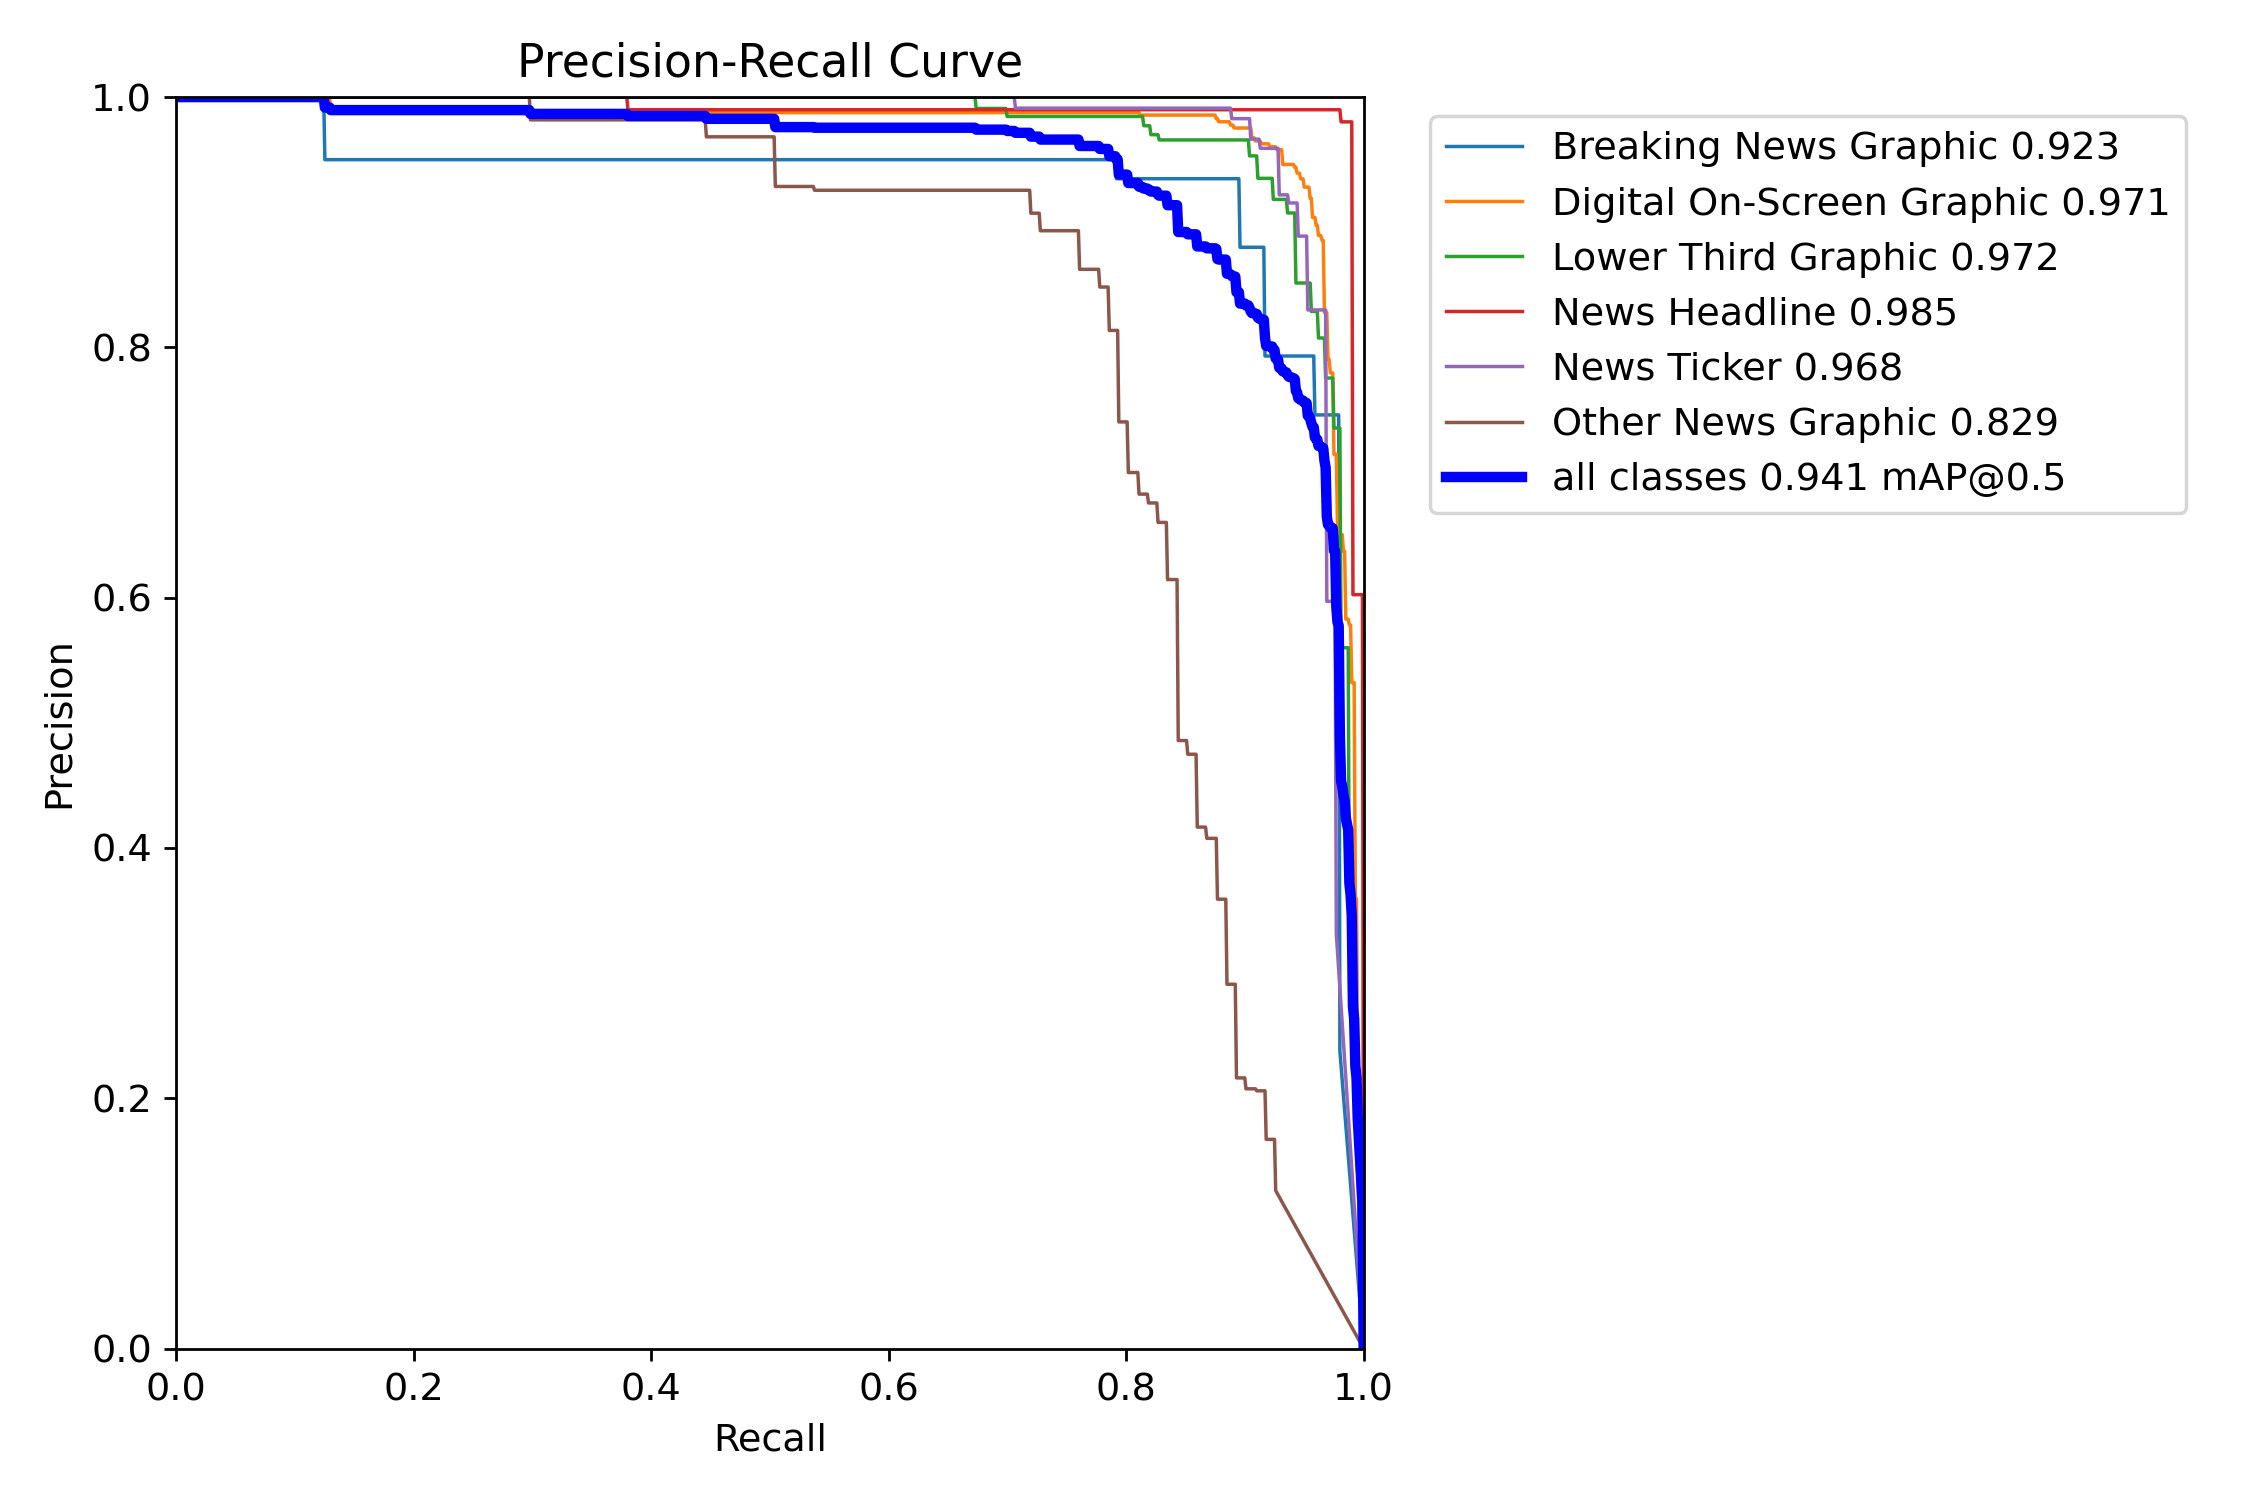

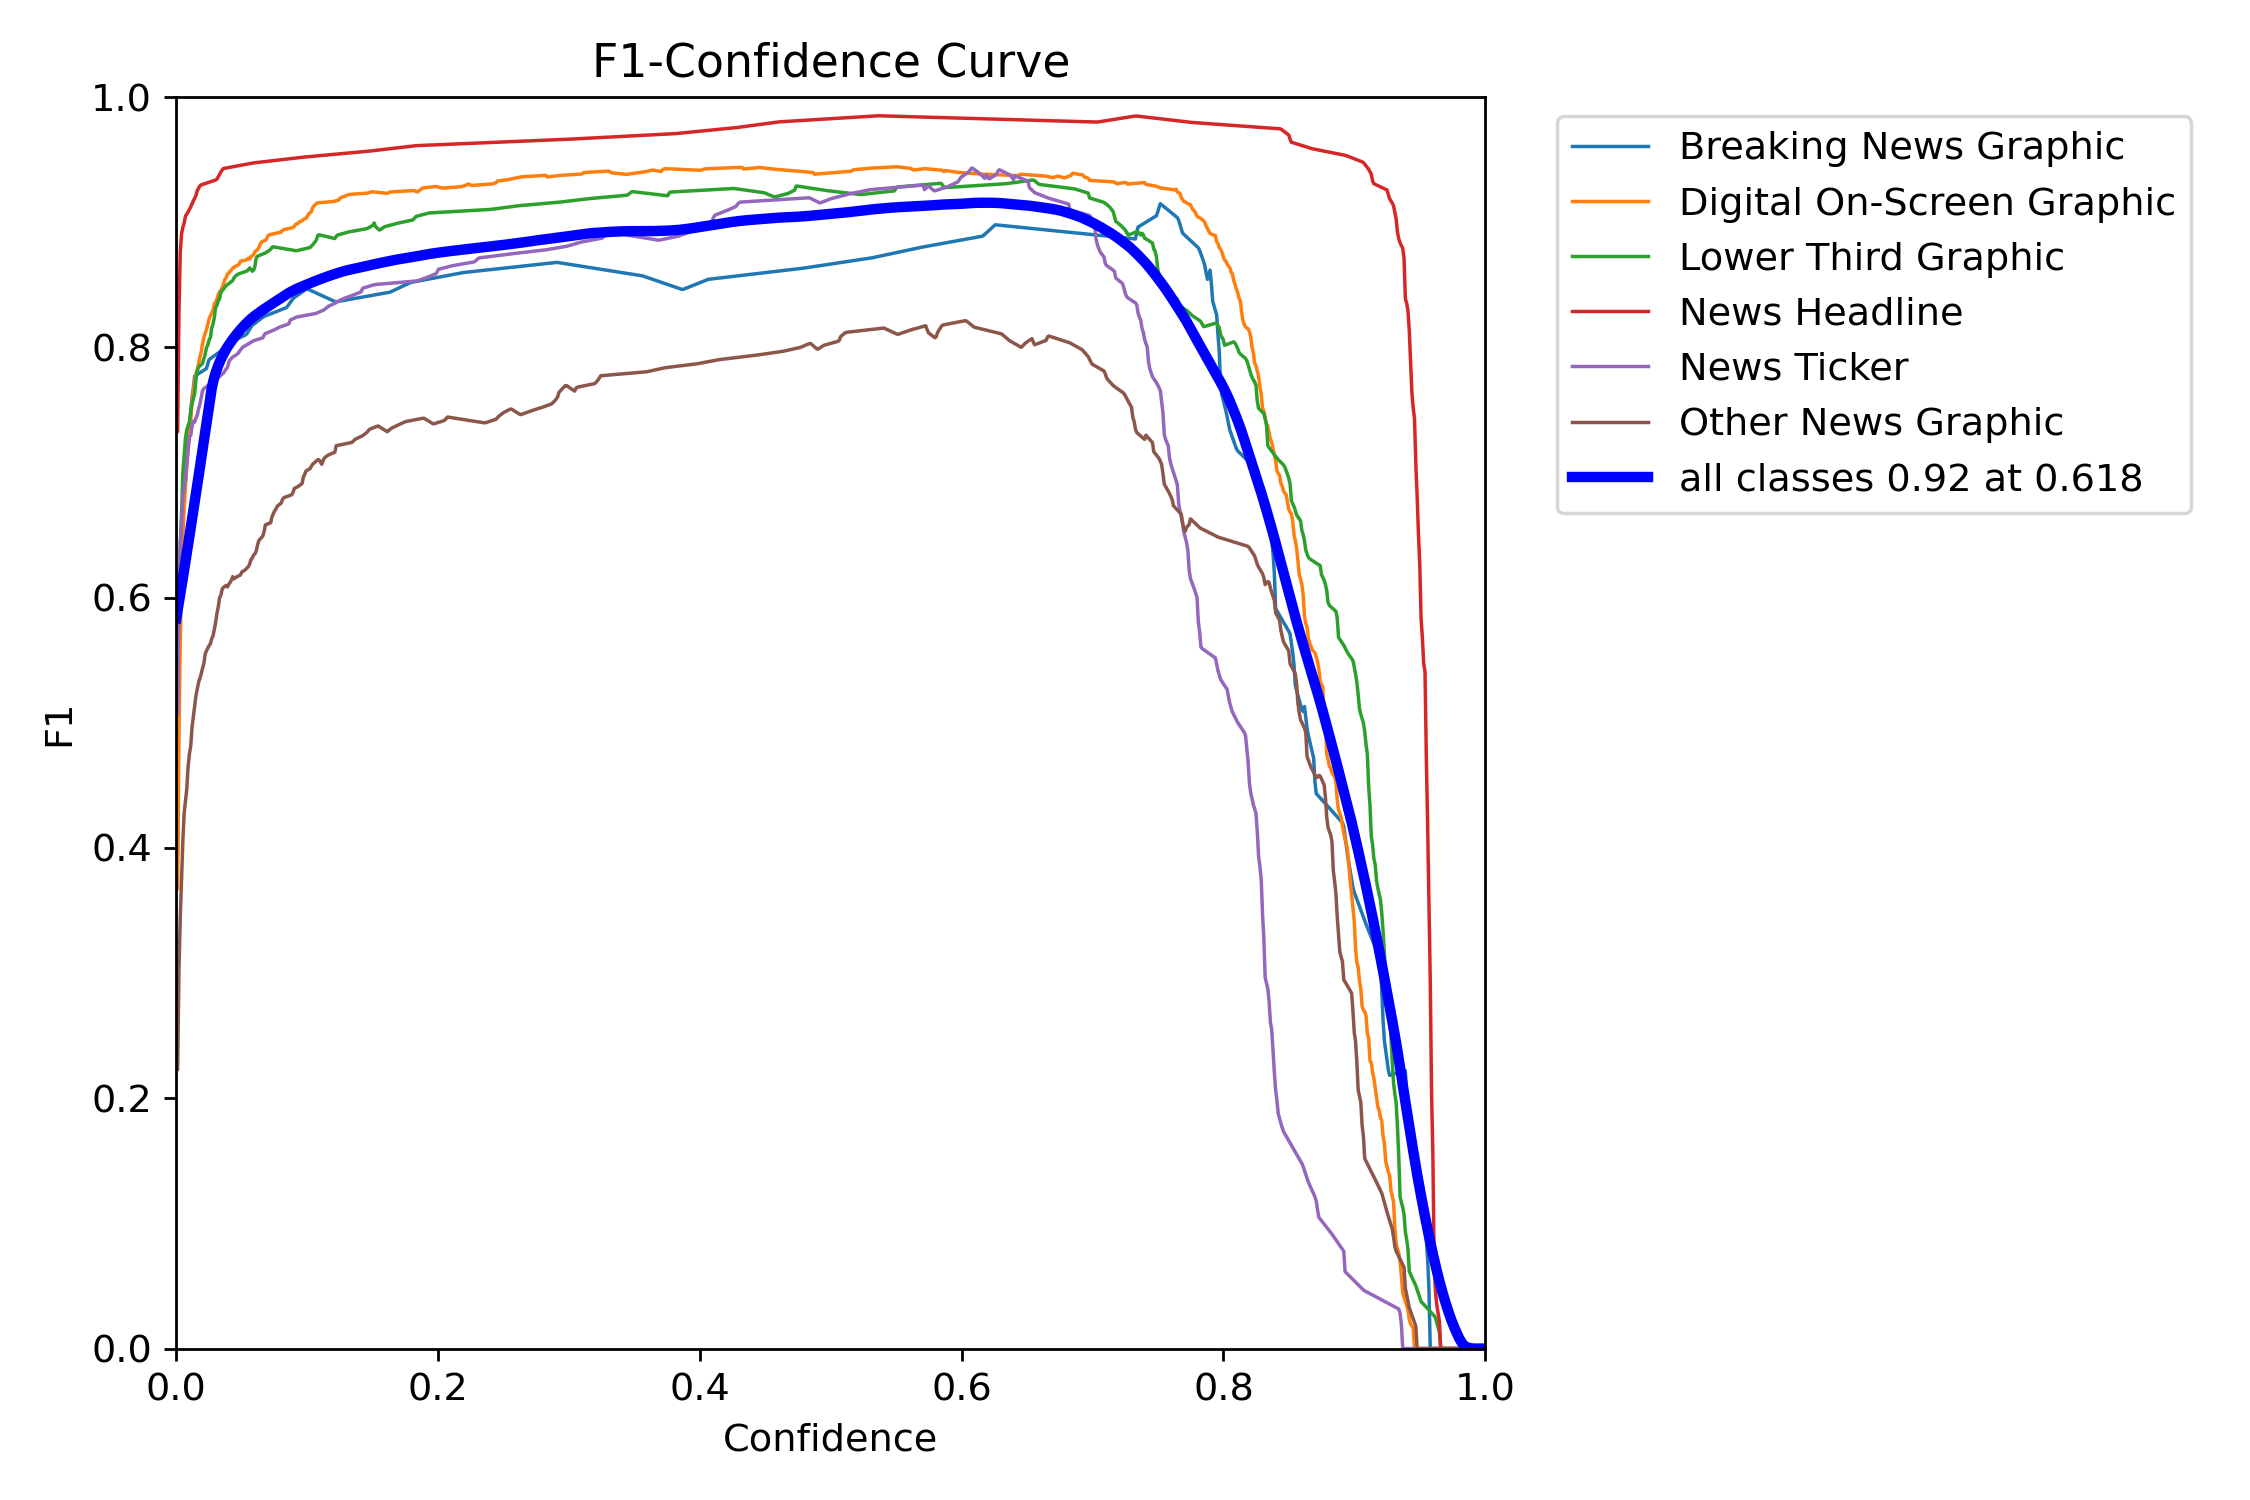

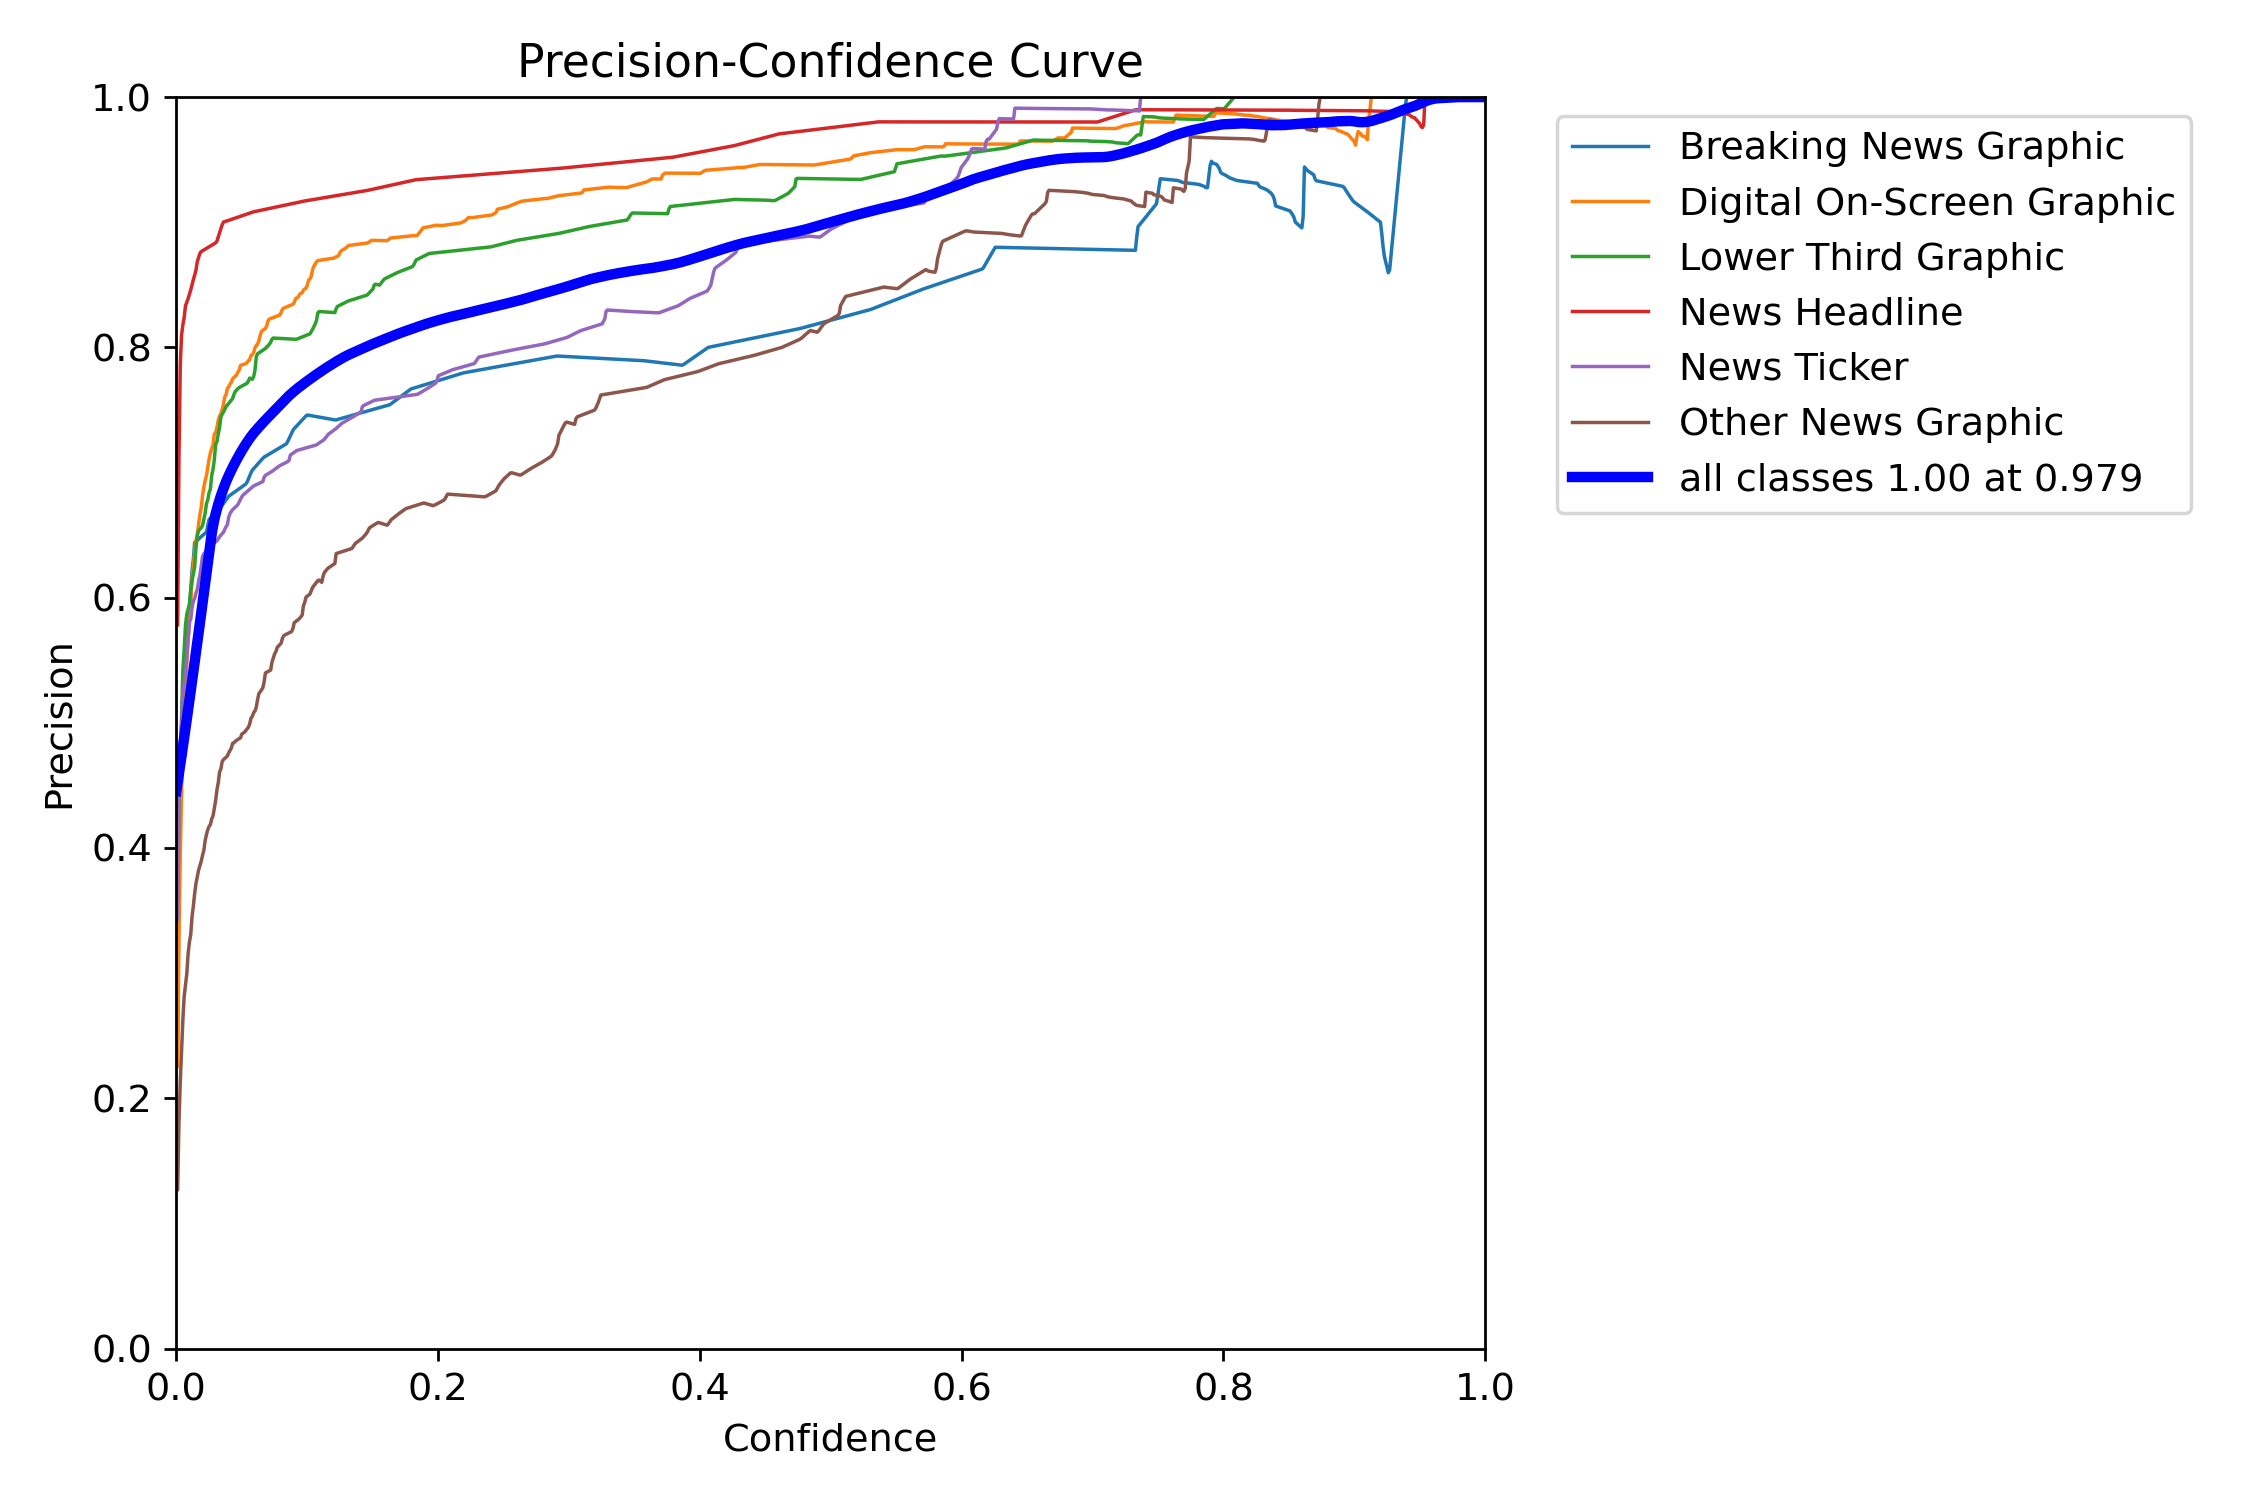

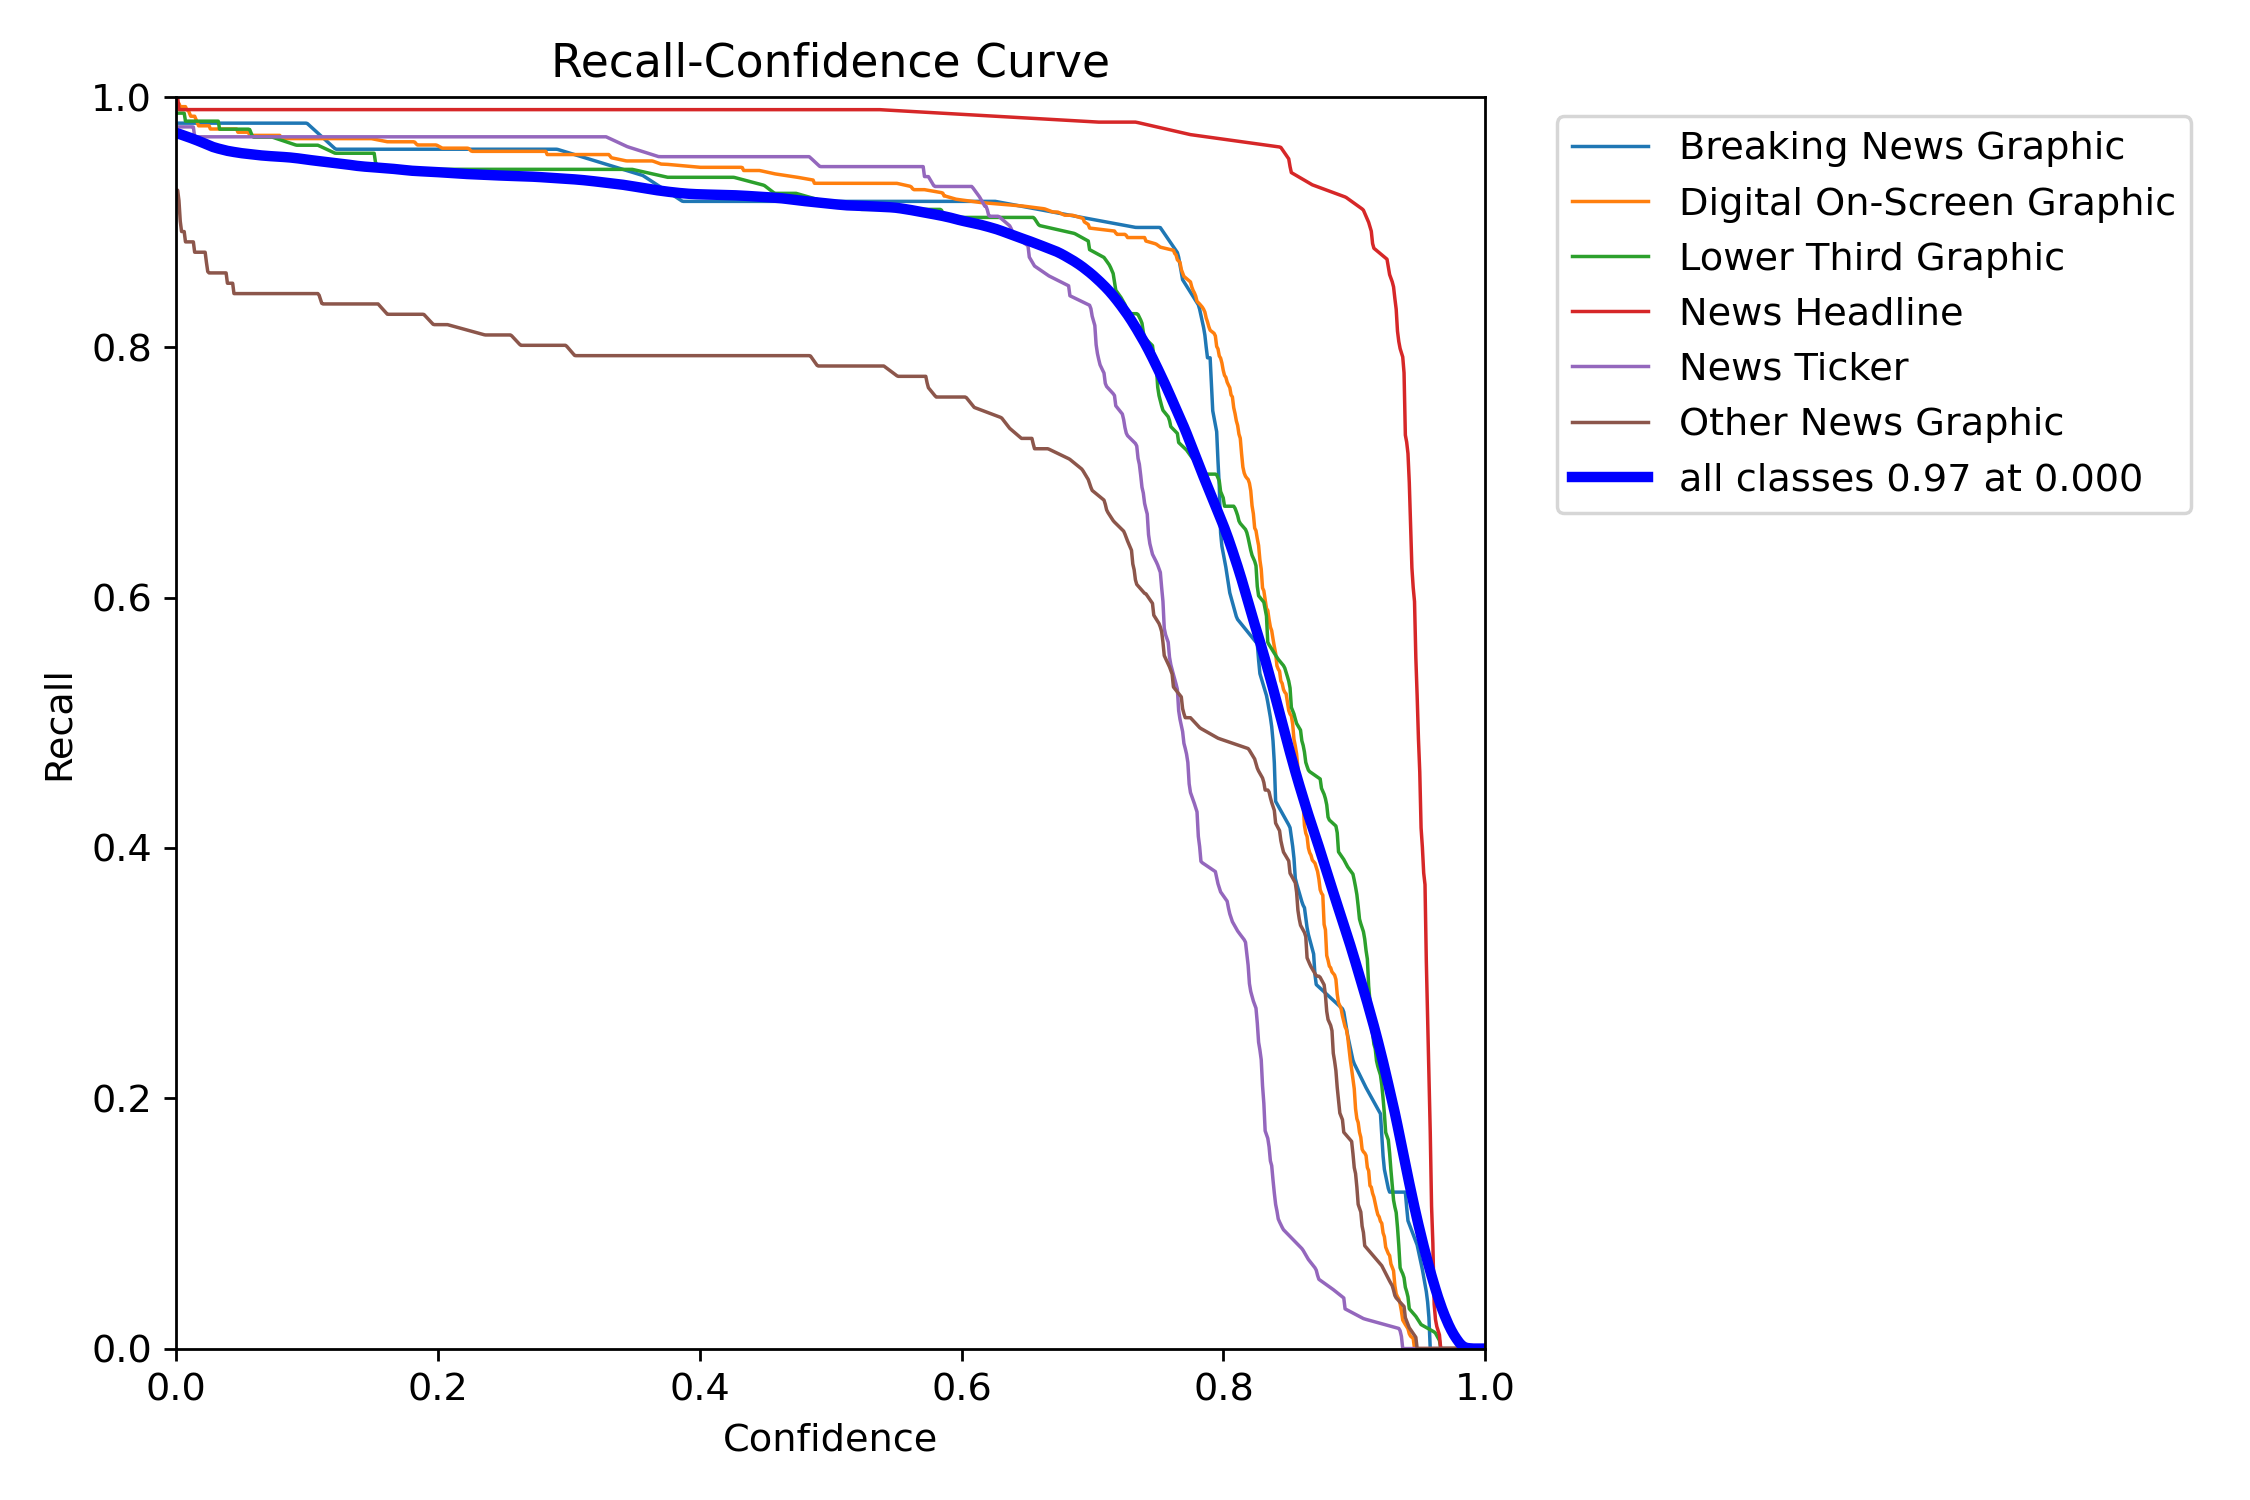

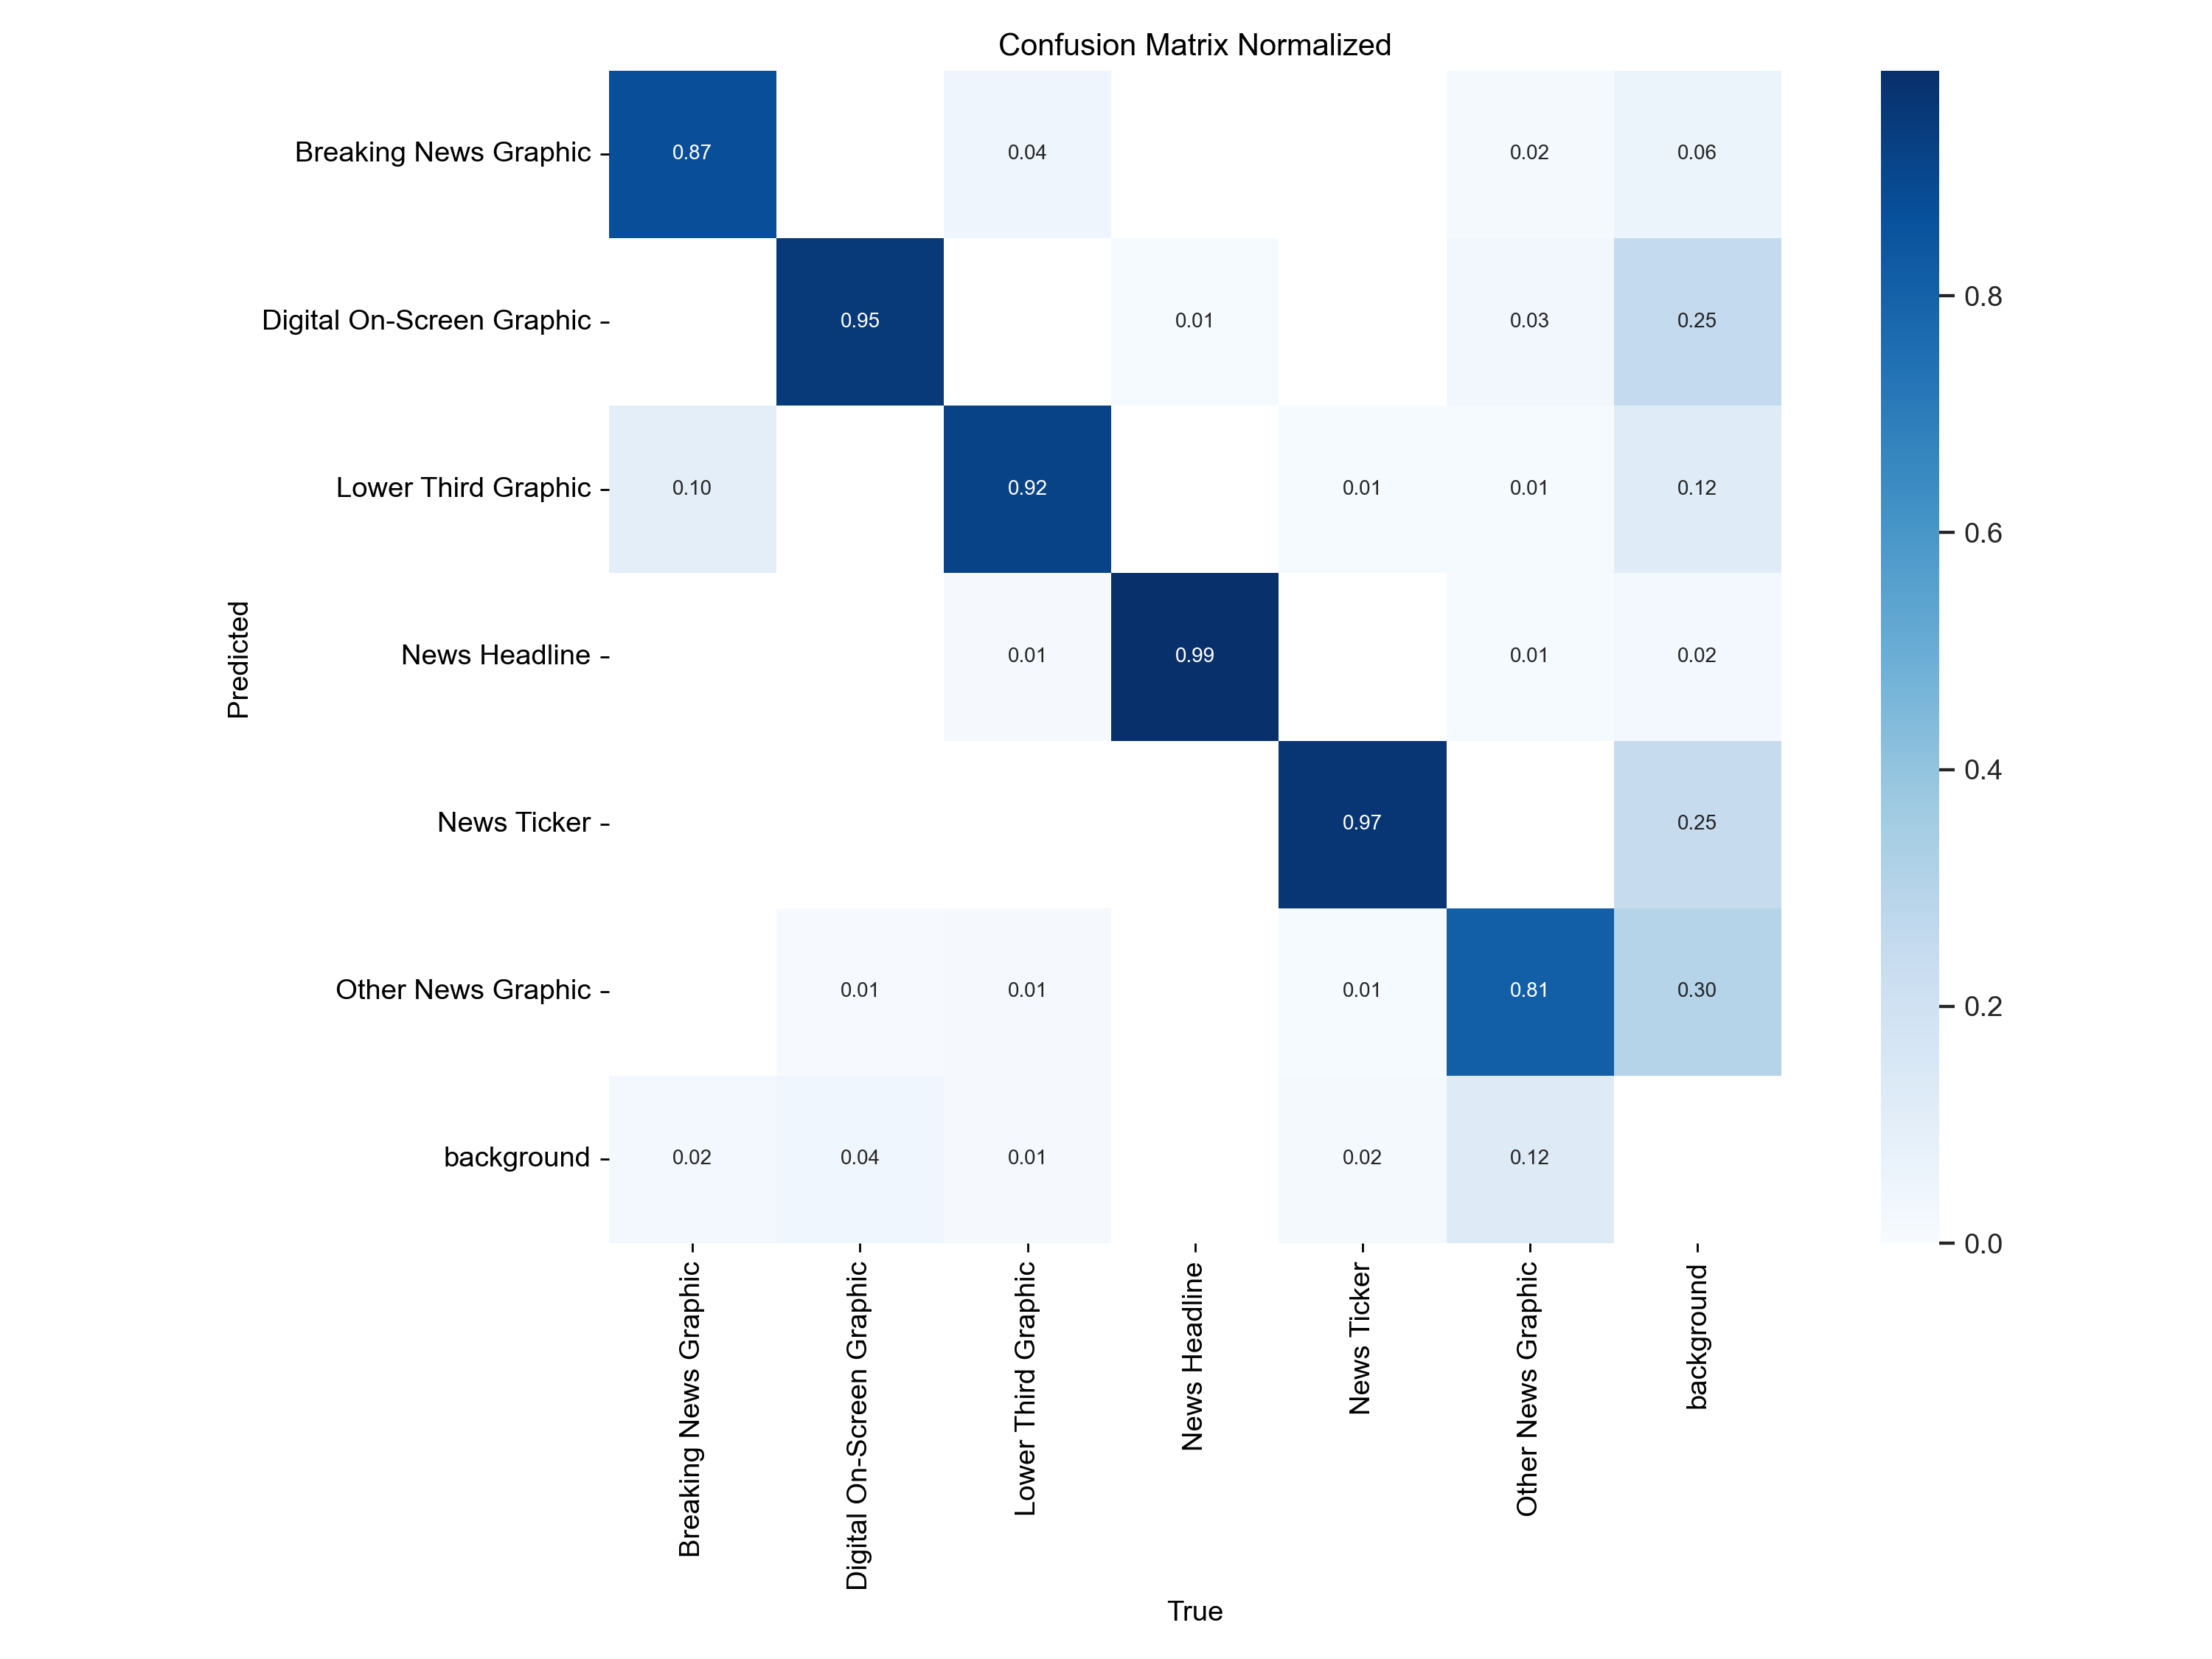

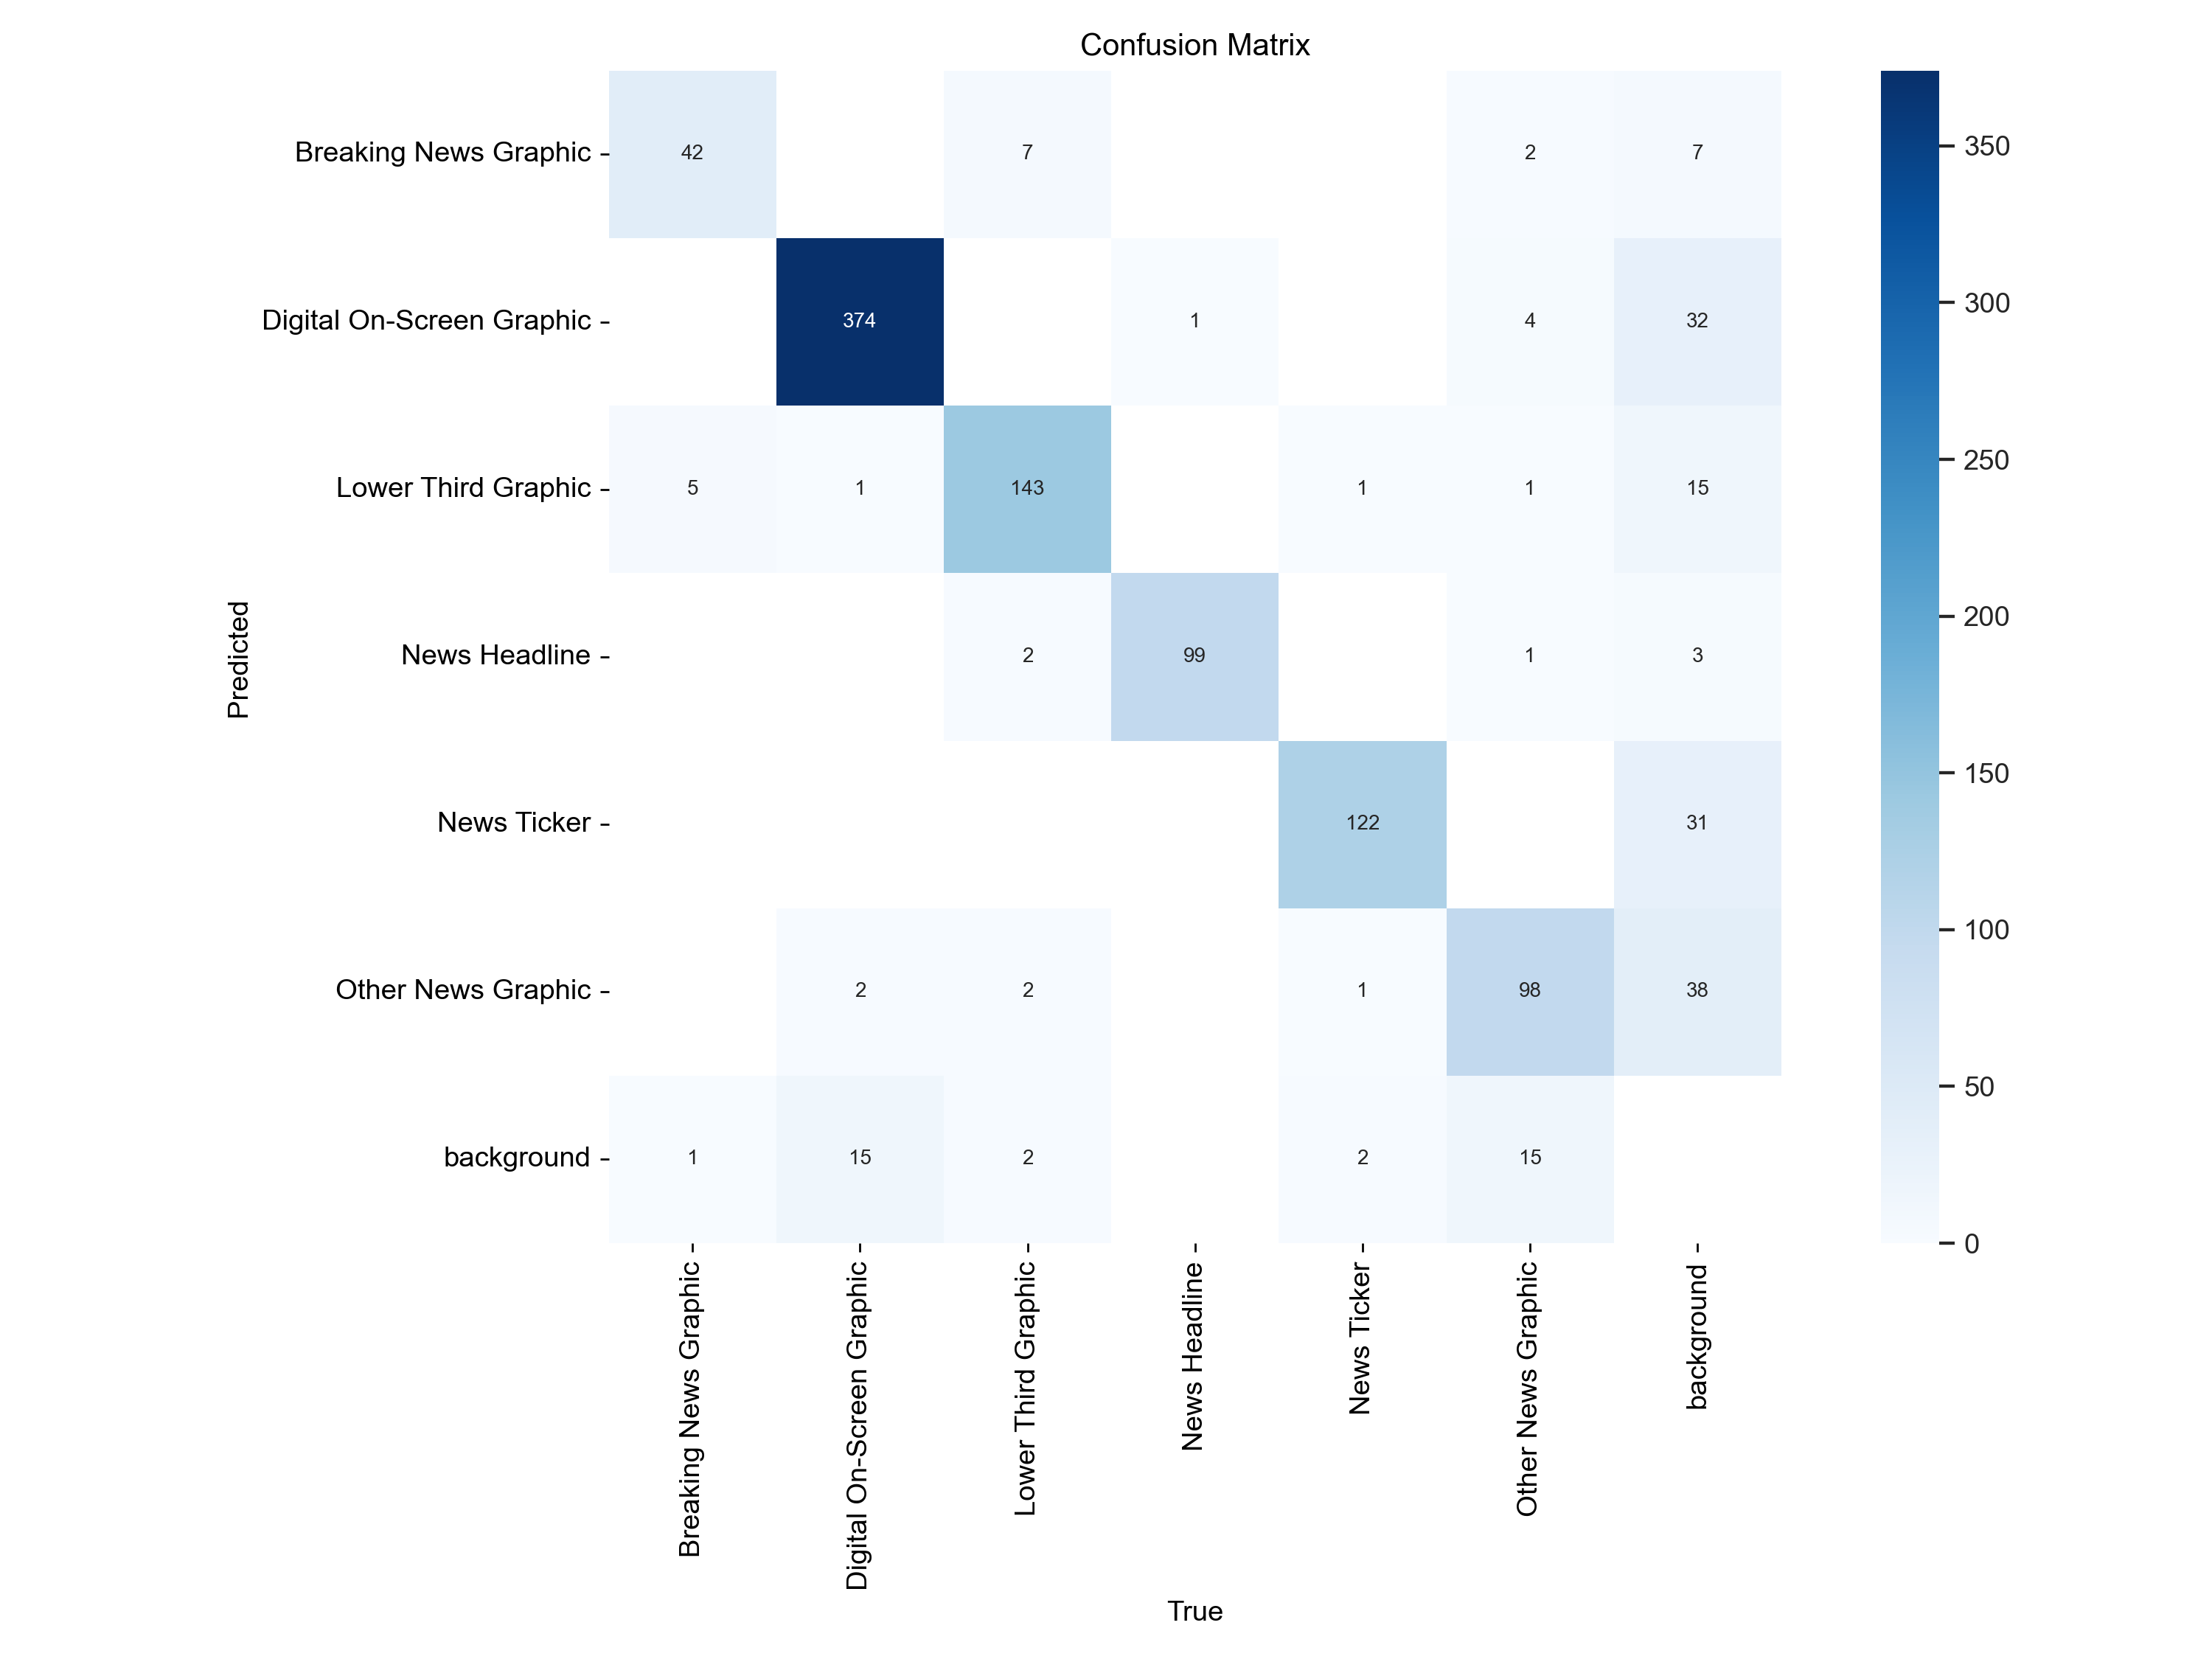


Displaying results.png from the non-R version of the folder:


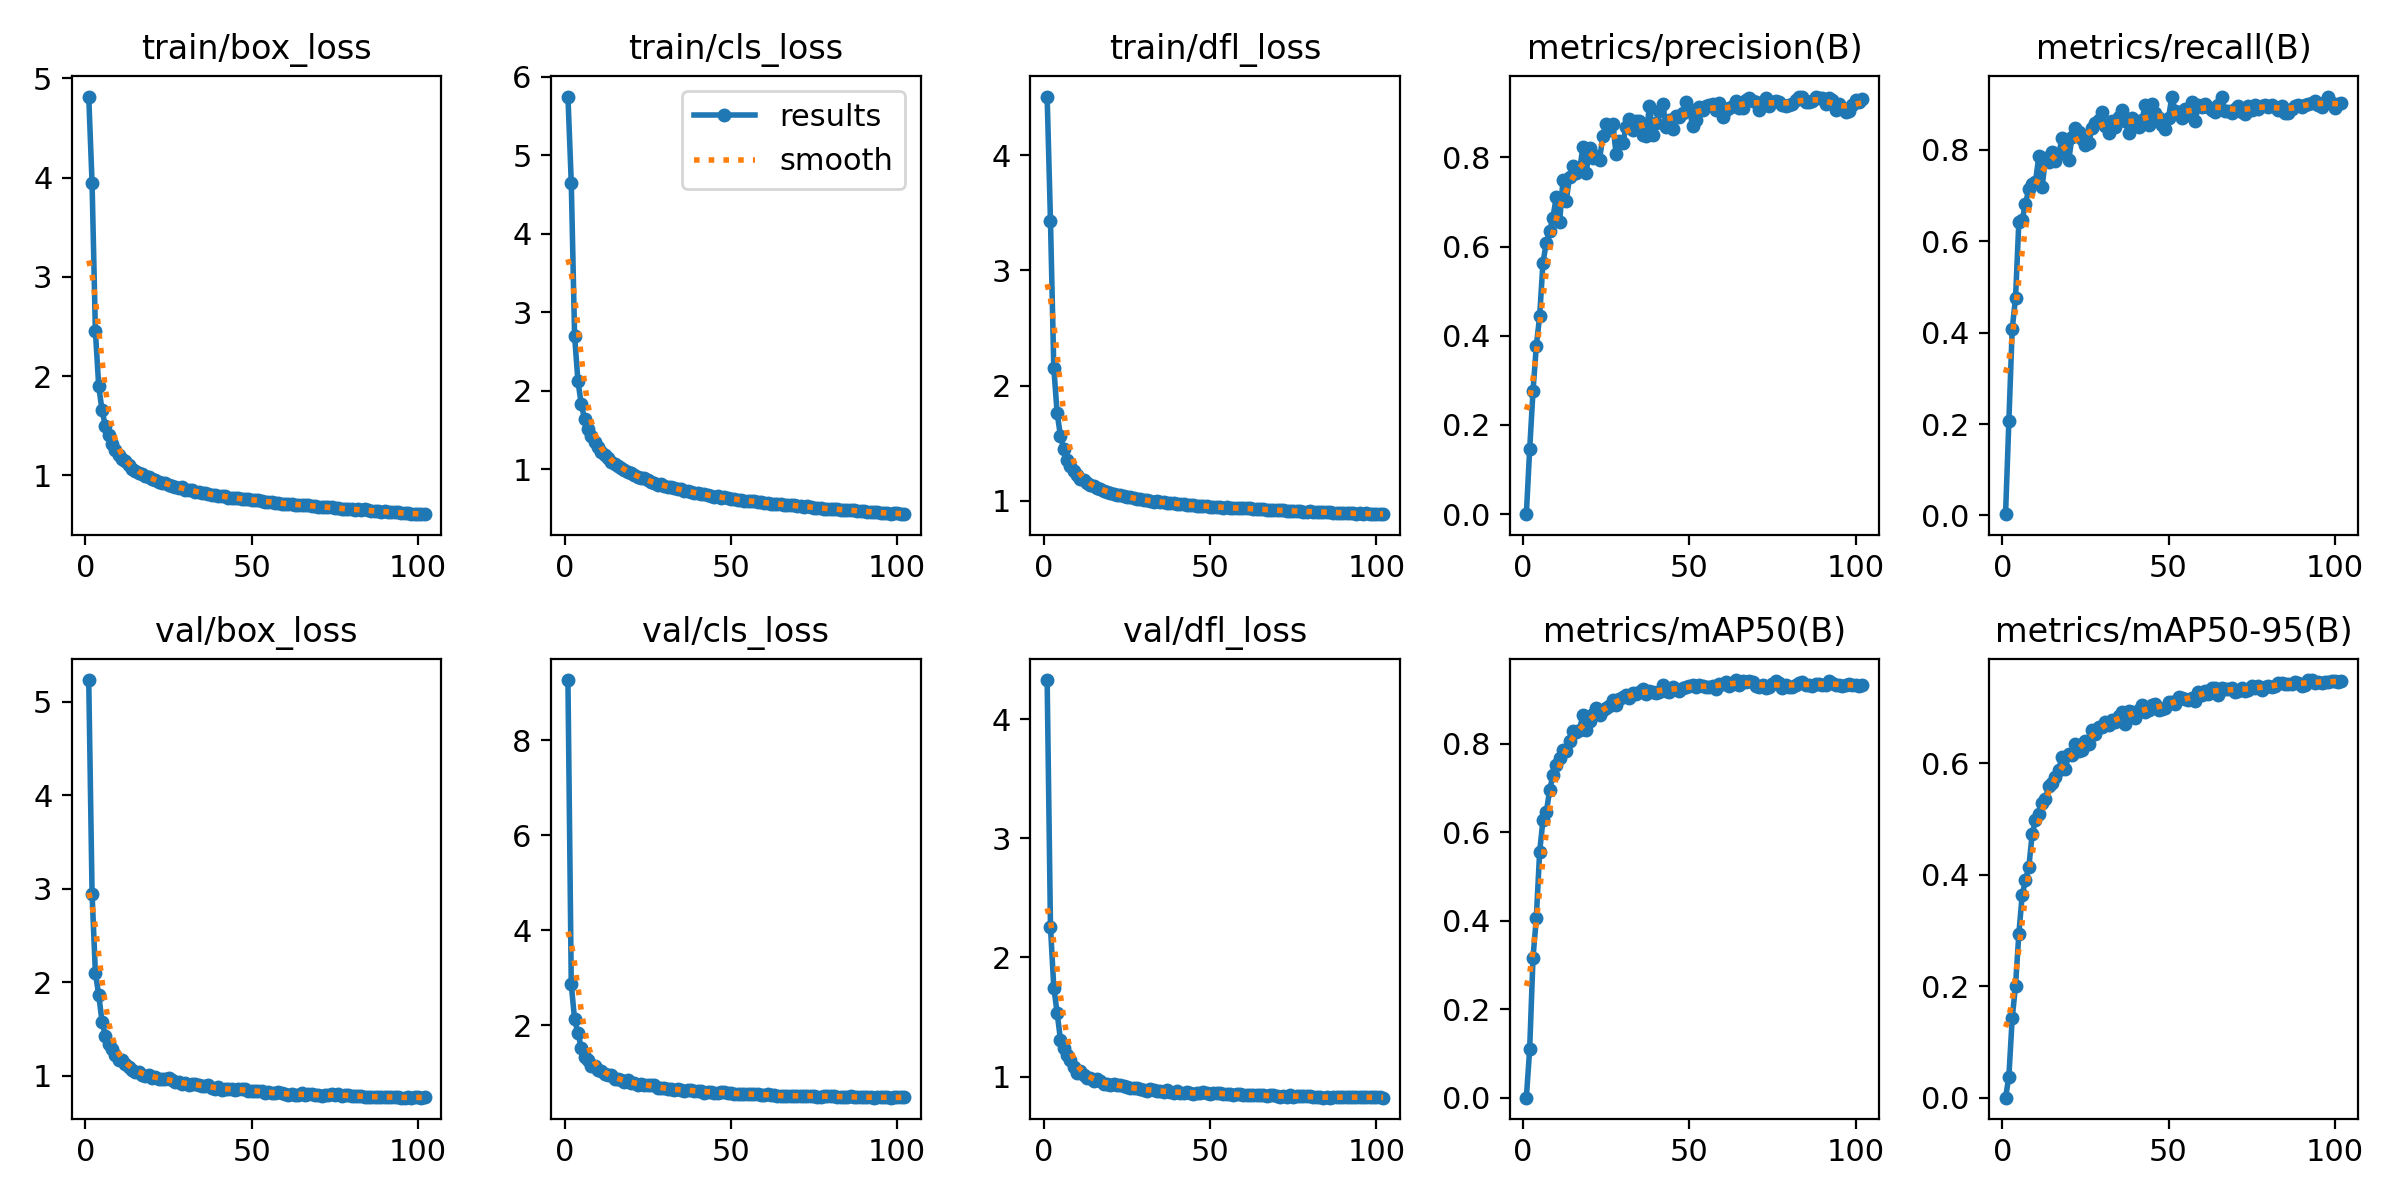

In [3]:
# Path to the "runs/detect" folder
detect_folder_path = os.path.join(os.getcwd(), "runs", "detect")

# Get all folders ending with "R" and sort them in ascending order
folders_ending_with_R = sorted([
    folder for folder in os.listdir(detect_folder_path)
    if folder.endswith("R") 
    and os.path.isdir(os.path.join(detect_folder_path, folder))
])

# Check if there are any folders to choose from
if not folders_ending_with_R:
    print("No Results folders ending with 'R' found!")
else:
    # Display available folders for user selection
    print("Available folders:")
    for i, folder in enumerate(folders_ending_with_R, start=1):
        print(f"{i}. {folder}")
    
    # Prompt the user to select a folder
    try:
        choice = int(input("Enter the number corresponding to the folder you want to use: ")) - 1
        if choice < 0 or choice >= len(folders_ending_with_R):
            raise IndexError
        selected_folder = folders_ending_with_R[choice]
    except (ValueError, IndexError):
        print("Invalid selection. Please restart and try again.")
        raise
    
    print(f"\nSelected folder: {selected_folder}")
    # Path to the selected folder
    eval_folder_path = os.path.join(detect_folder_path, selected_folder)

    # List of evaluation images excluding "val_batch" files
    evaluation_images = [
        img for img in os.listdir(eval_folder_path)
        if img.lower().endswith(('.png', '.jpg')) and "val_batch" not in img
    ]

    # Display images
    if not evaluation_images:
        print("No evaluation images found in the selected folder.")
    else:
        print("\nDisplaying evaluation images:")
        for img_file in evaluation_images:
            img_path = os.path.join(eval_folder_path, img_file)
            display(Image(filename=img_path))

    # Path to the non-R version of the selected folder
    non_r_folder = selected_folder.rstrip("R")
    non_r_folder_path = os.path.join(detect_folder_path, non_r_folder)

    # Check and display "results.png" if it exists
    results_png_path = os.path.join(non_r_folder_path, "results.png")
    if os.path.exists(results_png_path):
        print("\nDisplaying results.png from the non-R version of the folder:")
        display(Image(filename=results_png_path))
    else:
        print("No results.png found in the non-R version of the selected folder.")

### YOLOv12 Version Selection and Weights Path Identification

This script lists all available YOLOv   q versions in the `runs/detect` directory (excluding folders ending with "R"), sorts them, and prompts the user to select one for testing. After a valid selection, it identifies the path to the corresponding weights file (`best.pt`) for the chosen version and confirms the selection. Robust error handling ensures smooth execution by addressing cases of missing versions or invalid user input.

In [10]:
# Define the detect path
detect_path = os.path.join(os.getcwd(), "runs", "detect")

# Get all valid versions in the "runs/detect" directory
# Ensure folders contain "AFL" in their name and do not end with "R"
available_versions = sorted(
    [
        folder
        for folder in os.listdir(detect_path)
        if os.path.isdir(os.path.join(detect_path, folder))
        and not folder.endswith("R")  # Exclude folders ending with "R"
    ]
)

# Display options and prompt the user for input
print("Available versions:")
for i, version in enumerate(available_versions, start=1):
    print(f"{i}. {version}")

try:
    selected_index = int(input("Enter the number of the version you want to test: ")) - 1
    if selected_index < 0 or selected_index >= len(available_versions):
        raise ValueError("Invalid selection.")
except ValueError:
    raise ValueError("Invalid input. Please enter a valid number.")

# Set the selected version and path to the weights
selected_version = available_versions[selected_index]
weights_path = os.path.join(detect_path, selected_version, "weights", "best.pt")

# Output the selected version and the corresponding weights path
print(f"\nSelected version: {selected_version}")

# Verify the weights file exists
if not os.path.exists(weights_path):
    raise FileNotFoundError(f"Weights file not found: {weights_path}")

Available versions:
1. NGD-Yolov12_v1
2. NGD-Yolov12_v2
3. NGD-Yolov12_v3
4. NGD-Yolov12_v4
5. NGD-Yolov8_v1

Selected version: NGD-Yolov12_v4


### Code-based Metrics (Table Format)

This script analyzes the training and validation metrics for a selected YOLOv8 version. It reads the `results.csv` file from the specified version's folder, calculates averages for key metrics (e.g., precision, recall, mAP@50, mAP@50-95, and loss values), and displays both the final epoch values and their averages in a structured table. The script ensures robust error handling to manage missing files or invalid paths.

In [11]:
# Path to the selected version's folder
selected_version_path = os.path.join(detect_path, selected_version)

# Path to results CSV file
results_csv_path = os.path.join(selected_version_path, "results.csv")

# Ensure the file exists
if not os.path.exists(results_csv_path):
    raise FileNotFoundError(f"'results.csv' not found in the selected version: {selected_version_path}")

# Load the CSV file
results_df = pd.read_csv(results_csv_path)

# Compute averages for all metrics and losses
average_metrics = {
    "Metric": [
        "Precision", "Recall", "mAP@50", "mAP@50-95", 
        "Train Box Loss", "Train Classification Loss", 
        "Validation Box Loss", "Validation Classification Loss"
    ],
    "Final Value": [
        results_df['metrics/precision(B)'].iloc[-1],
        results_df['metrics/recall(B)'].iloc[-1],
        results_df['metrics/mAP50(B)'].iloc[-1],
        results_df['metrics/mAP50-95(B)'].iloc[-1],
        results_df['train/box_loss'].iloc[-1],
        results_df['train/cls_loss'].iloc[-1],
        results_df['val/box_loss'].iloc[-1],
        results_df['val/cls_loss'].iloc[-1]
    ],
    "Average Value": [
        results_df['metrics/precision(B)'].mean(),
        results_df['metrics/recall(B)'].mean(),
        results_df['metrics/mAP50(B)'].mean(),
        results_df['metrics/mAP50-95(B)'].mean(),
        results_df['train/box_loss'].mean(),
        results_df['train/cls_loss'].mean(),
        results_df['val/box_loss'].mean(),
        results_df['val/cls_loss'].mean()
    ]
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(average_metrics)

# Display the title and the table
print(f"📊 YOLO Model Training & Validation Metrics for Version: {selected_version}")
display(metrics_df)

📊 YOLO Model Training & Validation Metrics for Version: NGD-Yolov12_v4


,Metric,Final Value,Average Value
0,Precision,0.92995,0.840740
1,Recall,0.90131,0.835226
2,mAP@50,0.93262,0.870328
3,mAP@50-95,0.74745,0.656350
4,Train Box Loss,0.60899,0.900372
5,Train Classification Loss,0.42936,0.825272
6,Validation Box Loss,0.76954,0.969236
7,Validation Classification Loss,0.48549,0.775067


### YOLOv12 Metrics and Loss Visualization for Selected Version

This script reads the `results.csv` file from the selected YOLOv12 version's folder and visualizes key metrics and losses over epochs. It plots Precision, Recall, mAP@50, and mAP@50-95 to assess the model's performance throughout training. Additionally, it visualizes the training and validation losses for box and classification tasks, helping to track the model’s convergence and potential overfitting. The plots are displayed with clear labels and legends for easy interpretation.

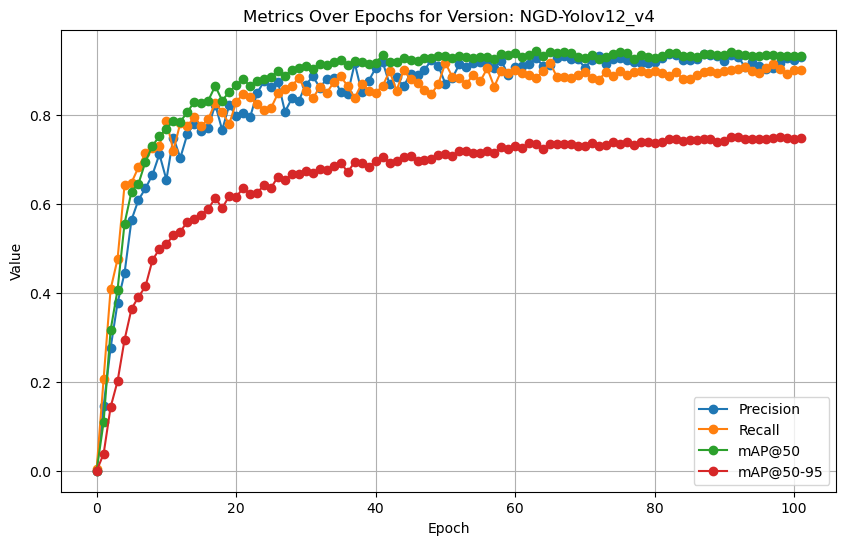

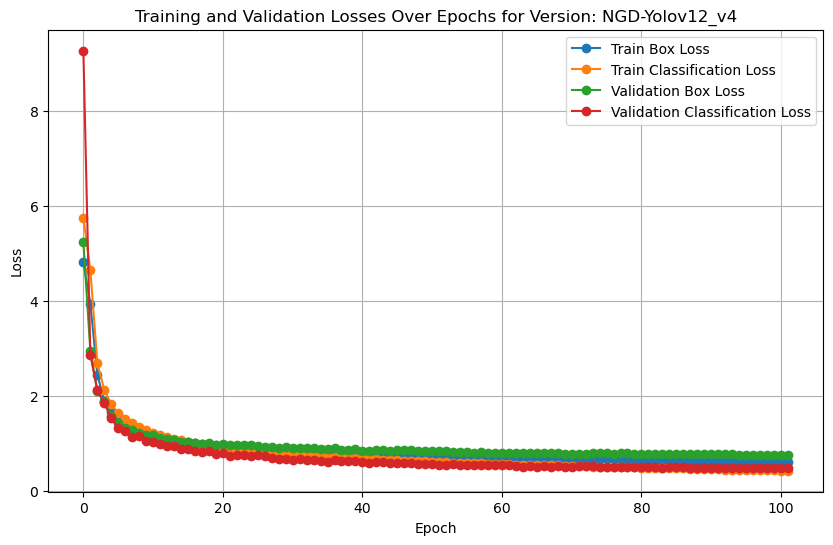

In [12]:
# Path to the selected version's folder
selected_version_path = os.path.join(detect_path, selected_version)

# Path to results CSV file
results_csv_path = os.path.join(selected_version_path, "results.csv")

# Ensure the file exists
if not os.path.exists(results_csv_path):
    raise FileNotFoundError(f"'results.csv' not found in the selected version: {selected_version_path}")

# Load the CSV file
results_df = pd.read_csv(results_csv_path)

# Plot Precision, Recall, mAP@50, and mAP@50-95 over epochs
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['metrics/precision(B)'], label='Precision', marker='o')
plt.plot(results_df.index, results_df['metrics/recall(B)'], label='Recall', marker='o')
plt.plot(results_df.index, results_df['metrics/mAP50(B)'], label='mAP@50', marker='o')
plt.plot(results_df.index, results_df['metrics/mAP50-95(B)'], label='mAP@50-95', marker='o')
plt.title(f"Metrics Over Epochs for Version: {selected_version}")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['train/box_loss'], label='Train Box Loss', marker='o')
plt.plot(results_df.index, results_df['train/cls_loss'], label='Train Classification Loss', marker='o')
plt.plot(results_df.index, results_df['val/box_loss'], label='Validation Box Loss', marker='o')
plt.plot(results_df.index, results_df['val/cls_loss'], label='Validation Classification Loss', marker='o')
plt.title(f"Training and Validation Losses Over Epochs for Version: {selected_version}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### YOLOv12 Learning Rate and Loss Visualization for Selected Version

This script reads the `results.csv` file from the selected YOLOv12 version's folder and generates three visualizations. First, it plots the learning rate schedule for different parameter groups (`pg0`, `pg1`, `pg2`) over epochs. Second, it visualizes the breakdown of training losses, including box loss, classification loss, and DFL loss. Finally, a scatter plot shows the relationship between precision and recall across epochs, with color coding for epoch progression. These visualizations provide insight into the model’s learning rate adjustments, loss behavior, and performance trade-offs.

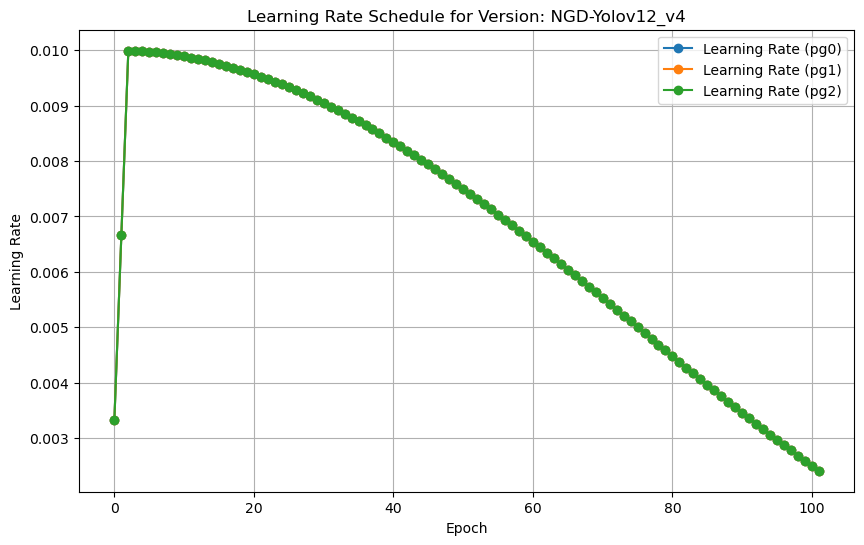

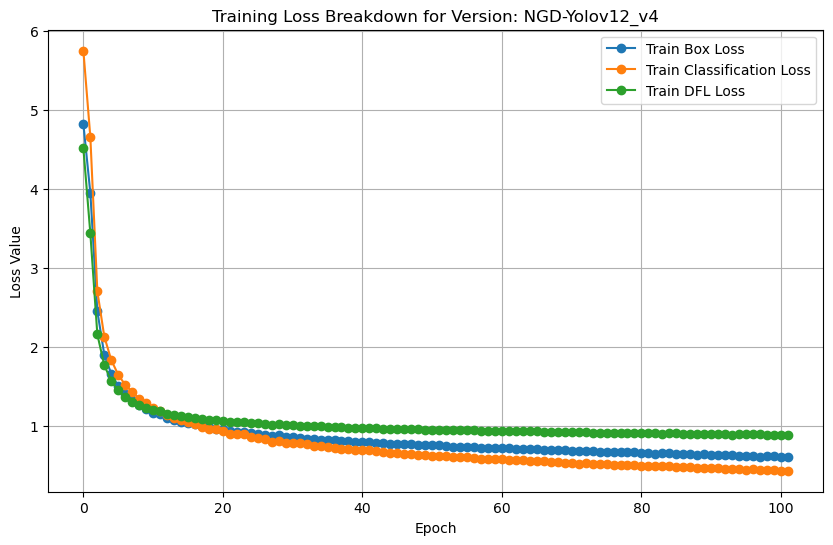

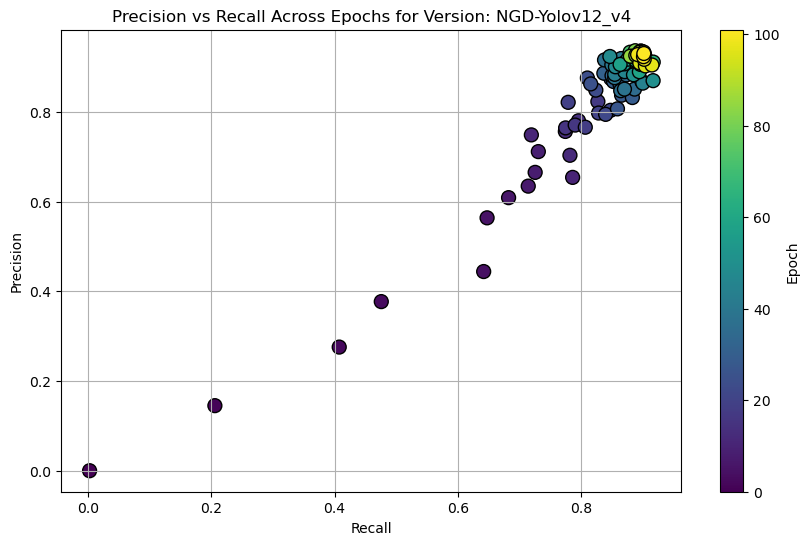

In [13]:
# Path to the selected version's folder
selected_version_path = os.path.join(detect_path, selected_version)

# Path to results CSV file
results_csv_path = os.path.join(selected_version_path, "results.csv")

# Ensure the file exists
if not os.path.exists(results_csv_path):
    raise FileNotFoundError(f"'results.csv' not found in the selected version: {selected_version_path}")

# Load the CSV file
results_df = pd.read_csv(results_csv_path)

# Plot Learning Rate Schedule
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['lr/pg0'], label='Learning Rate (pg0)', marker='o')
plt.plot(results_df.index, results_df['lr/pg1'], label='Learning Rate (pg1)', marker='o')
plt.plot(results_df.index, results_df['lr/pg2'], label='Learning Rate (pg2)', marker='o')
plt.title(f"Learning Rate Schedule for Version: {selected_version}")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss Breakdown
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['train/box_loss'], label='Train Box Loss', marker='o')
plt.plot(results_df.index, results_df['train/cls_loss'], label='Train Classification Loss', marker='o')
plt.plot(results_df.index, results_df['train/dfl_loss'], label='Train DFL Loss', marker='o')
plt.title(f"Training Loss Breakdown for Version: {selected_version}")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision vs. Recall
plt.figure(figsize=(10, 6))
plt.scatter(results_df['metrics/recall(B)'], results_df['metrics/precision(B)'], c=results_df.index, cmap='viridis', s=100, edgecolor='k')
plt.colorbar(label="Epoch")
plt.title(f"Precision vs Recall Across Epochs for Version: {selected_version}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

## Visualisation

### Image Processing Helper Functions

This script includes several functions for handling YOLOv12 model loading, image processing, and visualization. The `load_model` function loads a YOLOv12 model from a specified path, while the `load_image` function loads and converts an image to RGB format. The `ensure_rgb` function ensures that images are in the correct RGB format, handling grayscale and RGB/BGR images appropriately. 

In [19]:
# Load the model
def load_model(weights_path):
    if not os.path.exists(weights_path):
        raise FileNotFoundError(f"Weights file not found at {weights_path}.")
    return YOLO(weights_path)

# Load the image
def load_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found at {image_path}.")
    image = cv2.imread(image_path)  # Load image in BGR format
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Ensure images are in RGB format
def ensure_rgb(image):
    if len(image.shape) == 3 and image.shape[2] == 3:  # Check if the image has 3 channels
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if not np.array_equal(
            image, cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2RGB)
        ) else image
    elif len(image.shape) == 2:  # Grayscale image
        return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB
    else:
        raise ValueError("Unsupported image format. Image must have 1 (grayscale) or 3 (RGB/BGR) channels.")

### Display Original and Predicted Images Side by Side

This function displays the **original image** and the **predicted image with bounding boxes** side by side. It filters out bounding boxes with confidence below a specified threshold, and the images are shown for easy comparison of the model’s predictions against the original input.

In [20]:
def display_images_side_by_side(original, predicted, results, confidence_threshold=0.35, titles=("Original Test Image", "Predicted Image with Bounding Boxes")):
    # Ensure both images are in RGB format
    original_rgb = ensure_rgb(original)

    # Filter results to exclude bounding boxes with confidence below threshold
    filtered_boxes = []
    boxes = results[0].boxes  # Access the bounding boxes from the results
    if boxes is not None:
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Extract coordinates
            confidence = box.conf.item()           # Extract confidence as a scalar
            class_id = int(box.cls.item())         # Extract class ID as a scalar
            if confidence >= confidence_threshold:
                filtered_boxes.append((x1, y1, x2, y2, confidence, class_id))

    predicted_rgb = ensure_rgb(predicted)

    # Display images side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title(titles[0])
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(predicted_rgb)
    plt.title(titles[1])
    plt.axis("off")
    plt.tight_layout()
    plt.show()

### Crop and Display Bounding Boxes in a Grid

This function crops the image based on detected bounding boxes with confidence above a specified threshold and displays them in a grid. Each cropped image is labeled with its class name and confidence score, allowing for easy inspection of individual detected objects.

In [21]:
def crop_and_display_boxes_grouped(original_image, results, confidence_threshold=0.36):
    # Get bounding boxes and their corresponding class names
    boxes = results[0].boxes
    confidences = boxes.conf.cpu().numpy()
    class_ids = boxes.cls.cpu().numpy()

    # Initialize a list to store cropped images
    cropped_images = []
    cropped_titles = []

    # Loop through each bounding box and crop the region
    for i, (box, confidence, class_id) in enumerate(zip(boxes, confidences, class_ids)):
        if confidence >= confidence_threshold:
            # Get the coordinates of the bounding box
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            
            # Crop the image around the bounding box
            cropped_image = original_image[int(y1):int(y2), int(x1):int(x2)]
            
            # Map class ID to class name
            class_name = model.names[int(class_id)]

            # Store the cropped image and its title
            cropped_images.append(cropped_image)
            cropped_titles.append(f"{class_name} - Conf: {confidence:.2f}")

    # If there are cropped images, display them in a grid
    if cropped_images:
        num_images = len(cropped_images)
        grid_size = int(np.ceil(np.sqrt(num_images)))  # Calculate grid size for display

        # Plot cropped images in a grid
        plt.figure(figsize=(grid_size * 3, grid_size * 3))
        for i, (cropped_image, title) in enumerate(zip(cropped_images, cropped_titles)):
            plt.subplot(grid_size, grid_size, i + 1)
            plt.imshow(cropped_image)
            plt.title(title)
            plt.axis("off")
        plt.tight_layout()
        plt.show()

### Visual Analytics

This script defines a function `analyze_detections` that processes the results from a YOLOv12 model, analyzing the detected objects in an image. It extracts bounding boxes, class IDs, and confidence scores, then maps the class IDs to class names using the model’s predefined classes. The function performs a breakdown of detected objects, displaying the total number and counts for specific classes, such as "Mixed Waste," "Organic Waste," "Other Waste," and "Recyclable Material."

The function also visualizes the analysis through two types of plots:
1. **Bar Chart**: Displays the count of detected objects per class, with color-coded bars for easy identification.
2. **Scatter Plot**: Plots confidence scores for each detection, color-coded by class, allowing for quick assessment of model certainty. These visualizations help in evaluating detection accuracy and confidence.

In [ ]:
def analyze_detections(results, model):

    # Get detected boxes and classes
    boxes = results[0].boxes
    num_objects = len(boxes)

    if num_objects == 0:
        print("No (0) objects detected in the image.")
        return

    # Extract class IDs and confidence scores
    class_ids = boxes.cls.cpu().numpy()
    confidences = boxes.conf.cpu().numpy()

    # Map class IDs to class names
    class_names = [model.names[int(cls_id)] for cls_id in class_ids]

    # Define your custom classes and their colours
    fixed_classes = [
        "Breaking News Graphic",
        "Digital On-Screen Graphic",
        "Lower Third Graphic",
        "News Headline",
        "News Ticker",
        "Other News Graphic"
    ]

    class_counts = {class_name: 0 for class_name in fixed_classes}

    for class_name in class_names:
        if class_name in class_counts:
            class_counts[class_name] += 1

    colors = {
        "Breaking News Graphic": "orange",
        "Digital On-Screen Graphic": "red",
        "Lower Third Graphic": "blue",
        "News Headline": "limegreen",
        "News Ticker": "cyan",
        "Other News Graphic": "deepskyblue"
    }

    # === Print Analytics ===
    print("\n=== Image Analytics ===")
    print(f"Total Objects Detected: {num_objects}")
    print("Object Breakdown:")
    for class_name, count in class_counts.items():
        print(f"  - {class_name}: {count}")
    print("Confidence Scores:")
    for i, (class_name, confidence) in enumerate(zip(class_names, confidences)):
        print(f"  {i + 1}. {class_name} - Confidence: {confidence:.2f}")

    # 📊 Bar Chart: Count per Class
    plt.figure(figsize=(9, 5))
    plt.bar(class_counts.keys(), class_counts.values(),
            color=[colors.get(cls, "grey") for cls in class_counts.keys()])
    plt.title('Object Count per Class')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=15, ha='right')
    plt.yticks(range(0, max(class_counts.values()) + 2, 1))
    plt.tight_layout()
    plt.show()

    # 🔵 Scatter Plot: Confidence per Detection
    plt.figure(figsize=(10, 6))
    scatter_colors = [colors.get(cls, "grey") for cls in class_names]
    plt.scatter(class_names, confidences, c=scatter_colors, alpha=0.75, edgecolor='k')
    plt.title('Confidence Scores by Class')
    plt.xlabel('Detected Class')
    plt.ylabel('Confidence Score')
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.show()

### YOLOv12 Model Prediction and Evaluation on Test Images

This script loads a YOLOv12 model using the selected `best.pt` weights file and processes a set of test images from a designated folder. It checks if the test folder exists and contains valid image files, then iterates over each image to perform predictions. The script filters out bounding boxes with a confidence score below 0.36, renders the filtered results, and displays both the original and predicted images side by side.

Additionally, it analyzes the detection results, providing insights into the number of objects detected, the class breakdown, and confidence scores. Visualizations, such as side-by-side comparisons and cropped object grids, help evaluate the model’s performance on test images.

Selected weights file: /Volumes/Filis SSD/FYP/Accurate-Name-Extraction/3. Yolo Training/runs/detect/NGD-Yolov12_v4/weights/best.pt
Using MPS (Metal Performance Shaders) for acceleration.
Processing test image: /Volumes/Filis SSD/FYP/Accurate-Name-Extraction/Other/Testing/Image_T1.png

image 1/1 /Volumes/Filis SSD/FYP/Accurate-Name-Extraction/Other/Testing/Image_T1.png: 384x640 1 Digital On-Screen Graphic, 1 Lower Third Graphic, 2 News Tickers, 186.3ms
Speed: 11.3ms preprocess, 186.3ms inference, 25.8ms postprocess per image at shape (1, 3, 384, 640)


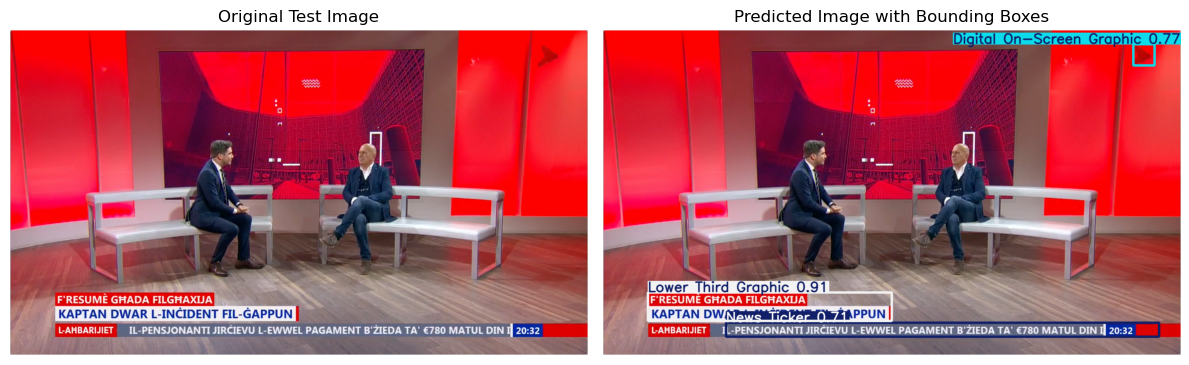


=== Image Analytics ===
Total Objects Detected: 3
Object Breakdown:
  - Breaking News Graphic: 0
  - Digital On-Screen Graphic: 1
  - Lower Third Graphic: 1
  - News Headline: 0
  - News Ticker: 1
  - Other News Graphic: 0
Confidence Scores:
  1. Lower Third Graphic - Confidence: 0.91
  2. Digital On-Screen Graphic - Confidence: 0.77
  3. News Ticker - Confidence: 0.71


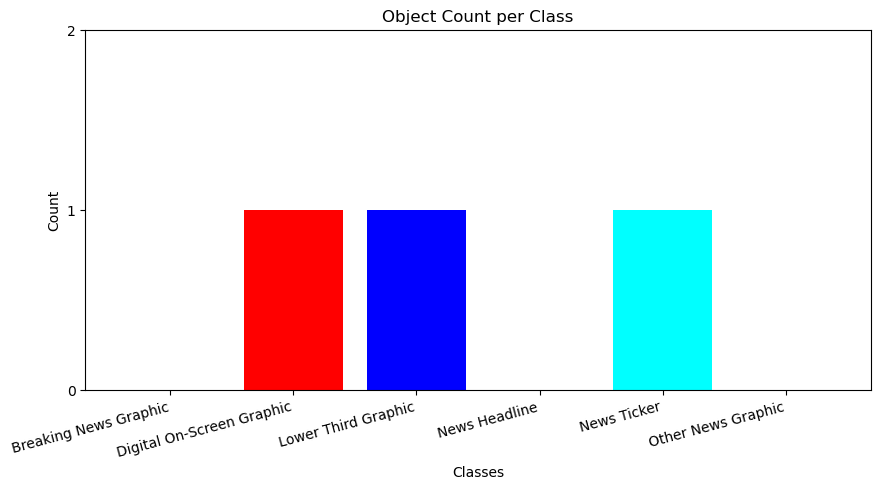

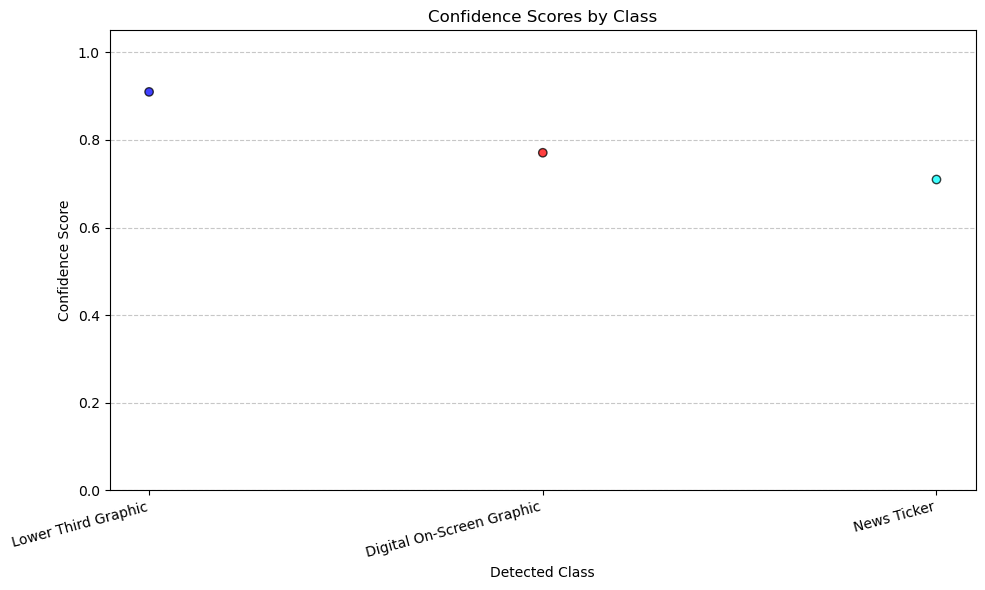

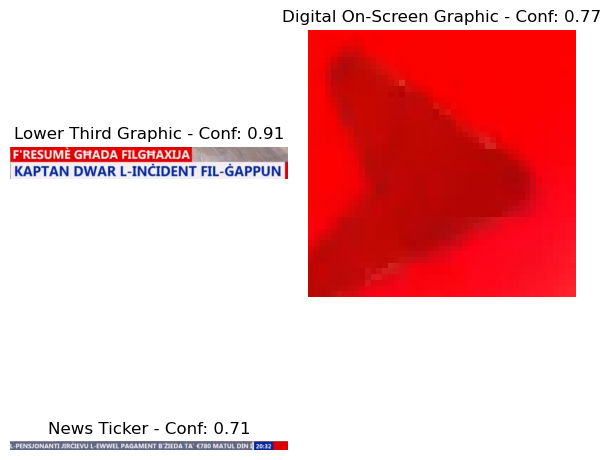

In [23]:
# Path to the selected version's folder
weights_path = os.path.join(os.getcwd(), "runs", "detect", selected_version, "weights", "best.pt")
test_folder_path = os.path.abspath(os.path.join(os.getcwd(), "..", "Other", "Testing"))

print(f"Selected weights file: {weights_path}")

# Validate and process all images in the test folder
if not os.path.exists(test_folder_path):
    raise FileNotFoundError(f"Test folder not found at: {test_folder_path}")

test_images = [img for img in os.listdir(test_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
if not test_images:
    raise ValueError(f"No valid image files found in the test folder: {test_folder_path}")

# Determine the device
device = determine_device()  # Ensure this function is defined elsewhere in your code

# Load the YOLO model
model = load_model(weights_path)

# Ensure plots are displayed inline
%matplotlib inline

# Loop through each test image
for test_image in test_images:
    test_image_path = os.path.join(test_folder_path, test_image)
    print(f"Processing test image: {test_image_path}")

    # Perform prediction on the current test image
    results = model.predict(source=test_image_path, device=device)

    # Load and process the images
    original_image = load_image(test_image_path)  # Ensure this loads the image in RGB

    # Filter out boxes with confidence less than 0.35
    filtered_boxes = results[0].boxes[results[0].boxes.conf > 0.36]

    # Create a copy of results and replace boxes with filtered ones
    results[0].boxes = filtered_boxes

    # Render the filtered results
    predicted_image = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)  # Convert rendered image to RGB

    # Display the original and predicted images side by side
    display_images_side_by_side(original_image, predicted_image, results)

    # Analyze and display detection analytics
    analyze_detections(results, model)

    # Crop and display the detected bounding boxes in a grouped grid
    crop_and_display_boxes_grouped(original_image, results)